# Regression Analysis in Machine learning

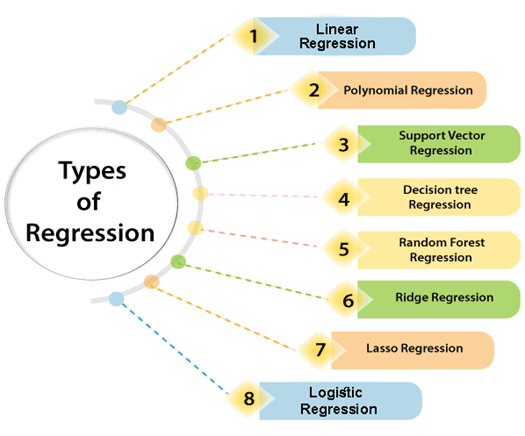

In [1]:
from PIL import Image

img = Image.open(r"C:\Users\Komal\Downloads\types-of-regression.png")
img

# Linear Regression Implementation

In [2]:
import pandas as pd

C:\Users\Komal\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

data["State"] = lb.fit_transform(data['State'])

In [9]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

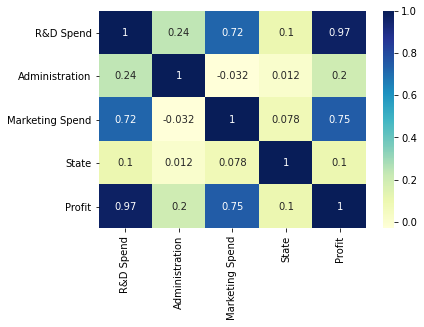

In [10]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True);

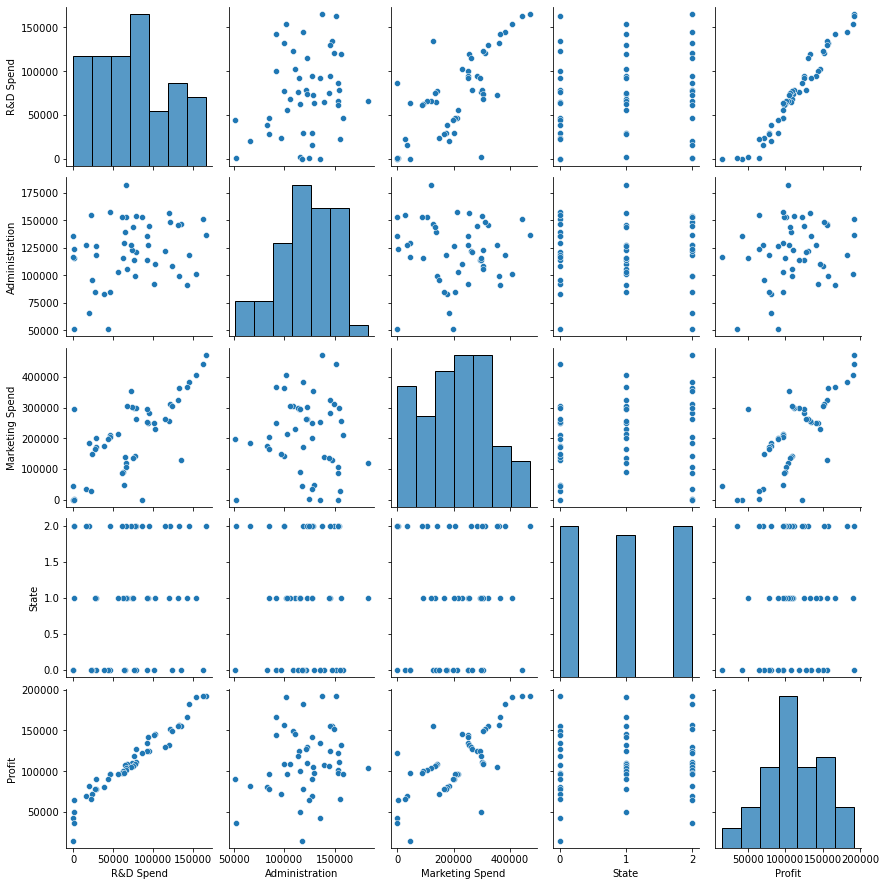

In [11]:
sns.pairplot(data)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

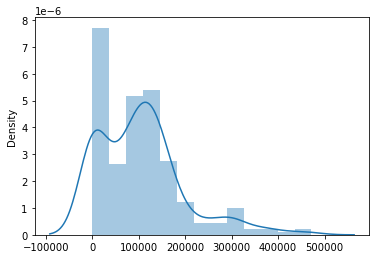

In [12]:
sns.distplot(data)

In [13]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [14]:
x = data.drop('Profit', axis=1)
y = data['Profit']

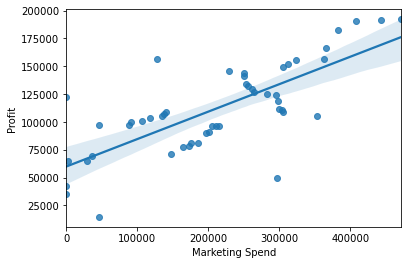

In [15]:
sns.regplot(x='Marketing Spend', y="Profit", data=data);

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=4)

In [17]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [18]:
pred = model1.predict(x_test)
pred

array([157404.18524382,  53640.94553338, 135778.46707186, 172519.46203814,
       128837.94662861])

In [19]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [20]:
print("Accuacy score", model1.score(x_test, y_test))

Accuacy score 0.9466112042298135


In [21]:
# calculate errors
print("MSE",mean_squared_error(y_test, pred))

MSE 119798009.2167534


In [22]:
#MAE
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,pred))



MAE 9361.847822972579


In [23]:
import numpy as np

print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

RMSE 10945.227691407492


In [24]:
from sklearn.metrics import r2_score, adjusted_rand_score
r2 = r2_score(y_test,pred)
print(r2)

0.9466112042298135


In [25]:
type(pred)

numpy.ndarray

In [26]:
y_pred = list(pred)
type(y_pred)

list

In [27]:
y_test1 = list(y_test)
type(y_test1)

list

In [28]:
total_lst = []
sum1 = 0
for i,j in zip(y_test1, y_pred):
#     print(i,':',j)
    n = i-j
    sum1 = sum1 + n**2
#     total_lst.append()
    
print(sum1/len(y_test1))

119798009.2167534


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

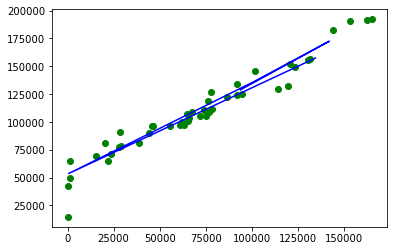

In [30]:
plt.scatter(x_train.iloc[:,0], y_train,color='g') 

plt.plot(x_test.iloc[:,0], pred,color='b') 



plt.show()

# OLS(Ordinay Least Square)

In [31]:
# !pip3 uninstall statsmodels

In [32]:
import statsmodels.api as sm


X = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [33]:
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              928.1
Date:                Mon, 26 Dec 2022   Prob (F-statistic):                    2.47e-43
Time:                        16:46:17   Log-Likelihood:                         -545.17
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      46   BIC:                                      1106.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# Decision tree regression

In [43]:
from sklearn.tree import DecisionTreeRegressor

 #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
model2 = DecisionTreeRegressor(random_state=0)     
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
model2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [45]:
model2.score(x_test, y_test)

0.8370781734940678

In [46]:
y_pred = model2.predict(x_test)

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16603.522000000004
Mean Squared Error: 365576900.39278
Root Mean Squared Error: 19120.065386728675


[Text(0.5605314960629921, 0.9444444444444444, 'x[0] <= 82404.586\nsquared_error = 1485025860.768\nsamples = 45\nvalue = 110151.182'),
 Text(0.2470472440944882, 0.8333333333333334, 'x[0] <= 28278.34\nsquared_error = 571069559.322\nsamples = 30\nvalue = 88957.278'),
 Text(0.06299212598425197, 0.7222222222222222, 'x[0] <= 500.115\nsquared_error = 390412258.9\nsamples = 9\nvalue = 59682.628'),
 Text(0.031496062992125984, 0.6111111111111112, 'x[2] <= 22586.529\nsquared_error = 194300320.897\nsamples = 2\nvalue = 28620.565'),
 Text(0.015748031496062992, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 42559.73'),
 Text(0.047244094488188976, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 14681.4'),
 Text(0.09448818897637795, 0.6111111111111112, 'x[2] <= 241189.781\nsquared_error = 92008906.652\nsamples = 7\nvalue = 68557.503'),
 Text(0.07874015748031496, 0.5, 'x[1] <= 90450.203\nsquared_error = 36655184.104\nsamples = 6\nvalue = 71735.295'),
 Text(0.03937007874015748, 0.3888888888888889, 'x[0

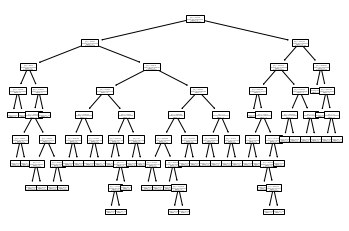

In [42]:
from sklearn import tree
tree.plot_tree(model2)

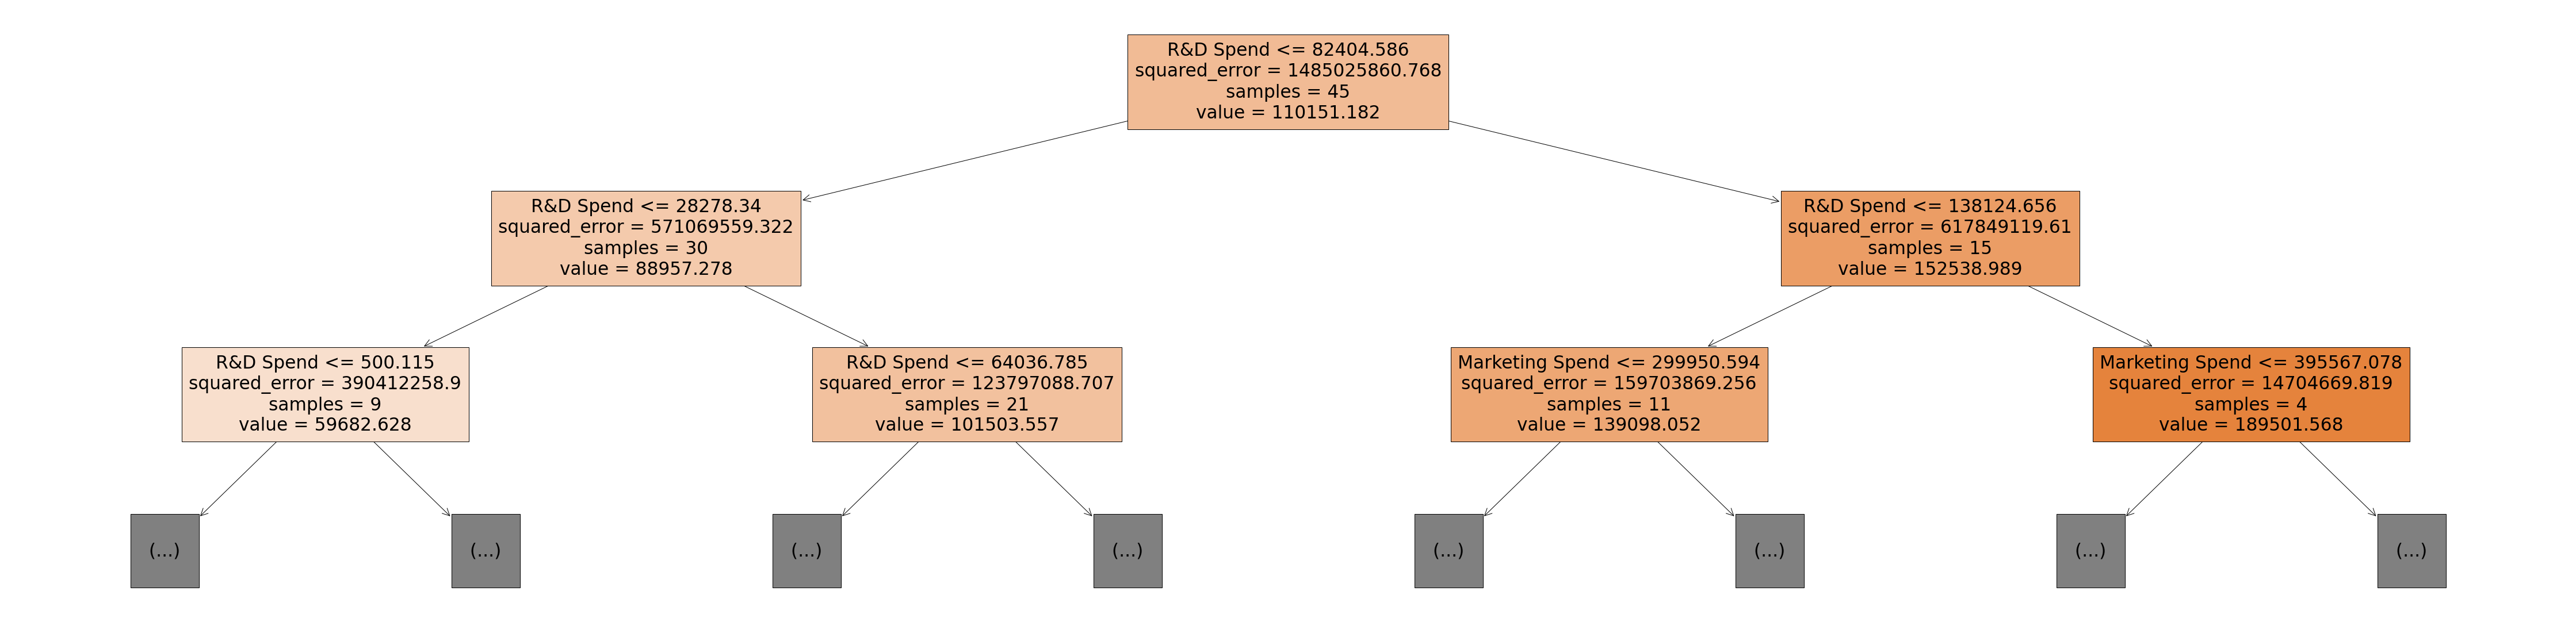

In [50]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model2, feature_names=data.columns, max_depth=2, filled=True);

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

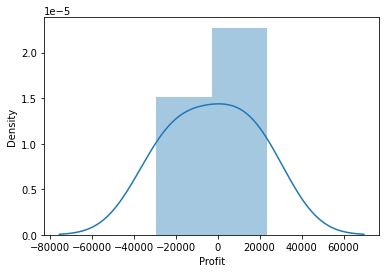

In [51]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

# Hyper Parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }



tuning_model=GridSearchCV(model2,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [54]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [55]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(x_train,y_train)

timer(start_time)

In [56]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [57]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.1,splitter='best')

In [58]:
tuned_hyper_model.fit(x_train,y_train)

C:\Users\Komal\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

In [59]:
tuned_pred=tuned_hyper_model.predict(x_test)

In [60]:
tuned_hyper_model.score(x_test, y_test)

0.8315196268581181

In [61]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 18481.054355555556
MSE: 378049607.66251606
RMSE: 19443.497824787497


In [62]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16603.522000000004
MSE: 365576900.39278
RMSE: 19120.065386728675


# Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
model3 = RandomForestRegressor(n_estimators=50, random_state=3)

model3.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=3)

In [80]:
model3.score(x_test, y_test)

0.9505757839372185

In [81]:
y_pred = model3.predict(x_test)

In [82]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9563.644400000001
MSE: 110901971.20958984
RMSE: 10531.000484739798


# catboost

In [85]:
# !pip install catboost

In [100]:
import catboost as cb

#https://catboost.ai/en/docs/concepts/python-reference_catboostregressor


In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [104]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [105]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [106]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 108422.7300244	test: 128779.8568604	best: 128779.8568604 (0)	total: 362us	remaining: 35.9ms
1:	learn: 105607.3811316	test: 126022.2342879	best: 126022.2342879 (1)	total: 672us	remaining: 33ms
2:	learn: 102668.4577779	test: 122922.7061241	best: 122922.7061241 (2)	total: 943us	remaining: 30.5ms
3:	learn: 99900.0174888	test: 119899.7979401	best: 119899.7979401 (3)	total: 1.21ms	remaining: 29.1ms
4:	learn: 97191.0228700	test: 117164.6427490	best: 117164.6427490 (4)	total: 1.49ms	remaining: 28.2ms
5:	learn: 94589.6830607	test: 114334.0400564	best: 114334.0400564 (5)	total: 1.76ms	remaining: 27.5ms
6:	learn: 91992.2552533	test: 111499.9945876	best: 111499.9945876 (6)	total: 2.02ms	remaining: 26.8ms
7:	learn: 89576.7956362	test: 109154.7193750	best: 109154.7193750 (7)	total: 2.3ms	remaining: 26.4ms
8:	learn: 87334.3225923	test: 106920.8732062	best: 106920.8732062 (8)	total: 2.57ms	remaining: 26ms
9:	learn: 85167.1158411	test: 104823.5720697	best: 104823.5720697 (9)	total: 2.84ms	rem

1:	learn: 92830.7065033	test: 112522.2533197	best: 112522.2533197 (1)	total: 1.35ms	remaining: 66ms
2:	learn: 84516.5180716	test: 103735.0041177	best: 103735.0041177 (2)	total: 1.7ms	remaining: 54.8ms
3:	learn: 77299.1834130	test: 95804.0225132	best: 95804.0225132 (3)	total: 2.04ms	remaining: 48.9ms
4:	learn: 70788.9516567	test: 89189.8788928	best: 89189.8788928 (4)	total: 2.38ms	remaining: 45.3ms
5:	learn: 65002.6074776	test: 82755.5178587	best: 82755.5178587 (5)	total: 2.69ms	remaining: 42.2ms
6:	learn: 59518.2319137	test: 76602.2251341	best: 76602.2251341 (6)	total: 3.01ms	remaining: 40ms
7:	learn: 54951.7122814	test: 72087.3889362	best: 72087.3889362 (7)	total: 3.3ms	remaining: 38ms
8:	learn: 50983.0263536	test: 68769.5091502	best: 68769.5091502 (8)	total: 3.61ms	remaining: 36.5ms
9:	learn: 47580.1252612	test: 65387.1507559	best: 65387.1507559 (9)	total: 3.91ms	remaining: 35.2ms
10:	learn: 44008.0713209	test: 61537.2860120	best: 61537.2860120 (10)	total: 4.2ms	remaining: 34ms
11:	l

1:	learn: 106763.5491442	test: 127203.6500139	best: 127203.6500139 (1)	total: 1.32ms	remaining: 64.8ms
2:	learn: 104217.8742319	test: 124558.6019939	best: 124558.6019939 (2)	total: 1.67ms	remaining: 54ms
3:	learn: 101937.1939057	test: 122021.6050977	best: 122021.6050977 (3)	total: 1.99ms	remaining: 47.8ms
4:	learn: 99962.2750373	test: 119979.4549722	best: 119979.4549722 (4)	total: 2.31ms	remaining: 43.8ms
5:	learn: 97945.6384623	test: 117903.9143168	best: 117903.9143168 (5)	total: 2.6ms	remaining: 40.7ms
6:	learn: 95865.9147234	test: 115649.5262723	best: 115649.5262723 (6)	total: 2.89ms	remaining: 38.5ms
7:	learn: 94006.4659026	test: 113755.6484743	best: 113755.6484743 (7)	total: 3.22ms	remaining: 37ms
8:	learn: 92175.8686811	test: 112153.7829435	best: 112153.7829435 (8)	total: 3.53ms	remaining: 35.7ms
9:	learn: 90316.4794733	test: 110431.3999318	best: 110431.3999318 (9)	total: 3.84ms	remaining: 34.5ms
10:	learn: 88273.7750616	test: 108371.0946294	best: 108371.0946294 (10)	total: 4.13m

129:	learn: 9726.3908189	test: 16173.3285995	best: 16173.3285995 (129)	total: 35.7ms	remaining: 5.5ms
130:	learn: 9617.0245852	test: 16097.5583826	best: 16097.5583826 (130)	total: 36.1ms	remaining: 5.23ms
131:	learn: 9561.6109226	test: 15901.5572520	best: 15901.5572520 (131)	total: 36.4ms	remaining: 4.96ms
132:	learn: 9476.3620717	test: 15775.0570297	best: 15775.0570297 (132)	total: 36.7ms	remaining: 4.69ms
133:	learn: 9379.7046784	test: 15655.2448664	best: 15655.2448664 (133)	total: 37ms	remaining: 4.41ms
134:	learn: 9284.7641313	test: 15501.9773873	best: 15501.9773873 (134)	total: 37.3ms	remaining: 4.14ms
135:	learn: 9194.4488788	test: 15416.3796368	best: 15416.3796368 (135)	total: 37.6ms	remaining: 3.87ms
136:	learn: 9121.9383249	test: 15390.3142000	best: 15390.3142000 (136)	total: 37.9ms	remaining: 3.59ms
137:	learn: 9029.8177211	test: 15198.6303956	best: 15198.6303956 (137)	total: 38.2ms	remaining: 3.32ms
138:	learn: 8941.7425521	test: 15146.5697056	best: 15146.5697056 (138)	total

15:	learn: 30691.6928314	test: 45483.2505829	best: 45483.2505829 (15)	total: 5.32ms	remaining: 44.6ms
16:	learn: 28692.4687671	test: 42953.2244483	best: 42953.2244483 (16)	total: 5.68ms	remaining: 44.5ms
17:	learn: 26782.3444705	test: 40741.0112960	best: 40741.0112960 (17)	total: 6.01ms	remaining: 44.1ms
18:	learn: 25027.4244258	test: 38524.0884487	best: 38524.0884487 (18)	total: 6.32ms	remaining: 43.6ms
19:	learn: 23365.0280235	test: 36243.9463762	best: 36243.9463762 (19)	total: 6.64ms	remaining: 43.2ms
20:	learn: 21836.4188009	test: 34781.6074526	best: 34781.6074526 (20)	total: 6.94ms	remaining: 42.7ms
21:	learn: 20942.8584927	test: 33577.1985481	best: 33577.1985481 (21)	total: 7.26ms	remaining: 42.3ms
22:	learn: 19730.9621234	test: 31971.5667302	best: 31971.5667302 (22)	total: 7.57ms	remaining: 41.8ms
23:	learn: 18720.1771846	test: 30600.9814241	best: 30600.9814241 (23)	total: 7.87ms	remaining: 41.3ms
24:	learn: 17776.7364639	test: 29261.6345651	best: 29261.6345651 (24)	total: 8.18m

48:	learn: 9331.2779874	test: 15512.9647926	best: 15512.9647926 (48)	total: 14ms	remaining: 28.8ms
49:	learn: 9170.2364279	test: 15130.8863017	best: 15130.8863017 (49)	total: 14.3ms	remaining: 28.6ms
50:	learn: 9056.8241287	test: 14847.7924824	best: 14847.7924824 (50)	total: 14.6ms	remaining: 28.3ms
51:	learn: 8805.3685566	test: 14645.6439501	best: 14645.6439501 (51)	total: 14.9ms	remaining: 28.1ms
52:	learn: 8679.2061562	test: 14561.4565364	best: 14561.4565364 (52)	total: 15.2ms	remaining: 27.8ms
53:	learn: 8559.9324092	test: 14464.6837548	best: 14464.6837548 (53)	total: 15.5ms	remaining: 27.5ms
54:	learn: 8459.5648683	test: 14170.0038402	best: 14170.0038402 (54)	total: 15.7ms	remaining: 27.2ms
55:	learn: 8382.2324360	test: 14040.7312647	best: 14040.7312647 (55)	total: 16ms	remaining: 26.9ms
56:	learn: 8277.2206393	test: 13783.0913013	best: 13783.0913013 (56)	total: 16.3ms	remaining: 26.6ms
57:	learn: 8194.4035328	test: 13530.0125197	best: 13530.0125197 (57)	total: 16.6ms	remaining: 2

83:	learn: 8492.7091931	test: 16992.6970041	best: 16934.4081348 (82)	total: 23.6ms	remaining: 18.5ms
84:	learn: 8337.5682141	test: 16803.4766905	best: 16803.4766905 (84)	total: 23.9ms	remaining: 18.3ms
85:	learn: 8298.9856282	test: 16774.7272690	best: 16774.7272690 (85)	total: 24.3ms	remaining: 18.1ms
86:	learn: 8143.0656368	test: 16798.4339653	best: 16774.7272690 (85)	total: 24.6ms	remaining: 17.8ms
87:	learn: 8084.4789277	test: 16766.3587325	best: 16766.3587325 (87)	total: 24.9ms	remaining: 17.5ms
88:	learn: 8035.0640484	test: 16819.7348504	best: 16766.3587325 (87)	total: 25.2ms	remaining: 17.3ms
89:	learn: 7903.8766427	test: 16655.3797957	best: 16655.3797957 (89)	total: 25.5ms	remaining: 17ms
90:	learn: 7869.2072905	test: 16628.4986708	best: 16628.4986708 (90)	total: 25.8ms	remaining: 16.7ms
91:	learn: 7730.0316372	test: 16658.5725881	best: 16628.4986708 (90)	total: 26.1ms	remaining: 16.5ms
92:	learn: 7688.4110872	test: 16581.4455363	best: 16581.4455363 (92)	total: 26.4ms	remaining:

60:	learn: 6042.0908234	test: 11560.5633393	best: 11560.5633393 (60)	total: 21.5ms	remaining: 49.1ms
61:	learn: 5938.3200128	test: 11537.9294421	best: 11537.9294421 (61)	total: 21.9ms	remaining: 48.6ms
62:	learn: 5879.9652968	test: 11325.7957850	best: 11325.7957850 (62)	total: 22.1ms	remaining: 48.1ms
63:	learn: 5745.3560590	test: 11248.6181611	best: 11248.6181611 (63)	total: 22.4ms	remaining: 47.6ms
64:	learn: 5691.2246105	test: 11298.4391471	best: 11248.6181611 (63)	total: 22.7ms	remaining: 47.2ms
65:	learn: 5582.0771746	test: 11176.2670114	best: 11176.2670114 (65)	total: 23ms	remaining: 46.6ms
66:	learn: 5440.0490476	test: 11318.1986122	best: 11176.2670114 (65)	total: 23.3ms	remaining: 46.2ms
67:	learn: 5356.5837440	test: 11297.1715168	best: 11176.2670114 (65)	total: 23.5ms	remaining: 45.7ms
68:	learn: 5240.1263856	test: 11428.6523690	best: 11176.2670114 (65)	total: 23.8ms	remaining: 45.2ms
69:	learn: 5185.7266986	test: 11542.8364270	best: 11176.2670114 (65)	total: 24.1ms	remaining:

1:	learn: 92830.7065033	test: 112522.2533197	best: 112522.2533197 (1)	total: 1.33ms	remaining: 131ms
2:	learn: 84516.5180716	test: 103735.0041177	best: 103735.0041177 (2)	total: 1.63ms	remaining: 107ms
3:	learn: 77299.1834130	test: 95804.0225132	best: 95804.0225132 (3)	total: 1.92ms	remaining: 94ms
4:	learn: 70788.9516567	test: 89189.8788928	best: 89189.8788928 (4)	total: 2.3ms	remaining: 89.7ms
5:	learn: 65002.6074776	test: 82755.5178587	best: 82755.5178587 (5)	total: 2.58ms	remaining: 83.3ms
6:	learn: 59518.2319137	test: 76602.2251341	best: 76602.2251341 (6)	total: 2.85ms	remaining: 78.6ms
7:	learn: 54951.7122814	test: 72087.3889362	best: 72087.3889362 (7)	total: 3.13ms	remaining: 75.2ms
8:	learn: 50983.0263536	test: 68769.5091502	best: 68769.5091502 (8)	total: 3.41ms	remaining: 72.3ms
9:	learn: 47580.1252612	test: 65387.1507559	best: 65387.1507559 (9)	total: 3.68ms	remaining: 69.9ms
10:	learn: 44008.0713209	test: 61537.2860120	best: 61537.2860120 (10)	total: 3.94ms	remaining: 67.8ms

118:	learn: 12663.9290823	test: 21339.9033144	best: 21339.9033144 (118)	total: 32.6ms	remaining: 22.2ms
119:	learn: 12534.9518317	test: 21098.3178895	best: 21098.3178895 (119)	total: 32.9ms	remaining: 22ms
120:	learn: 12410.5471894	test: 20868.5180855	best: 20868.5180855 (120)	total: 33.2ms	remaining: 21.7ms
121:	learn: 12318.2905983	test: 20714.0202069	best: 20714.0202069 (121)	total: 33.6ms	remaining: 21.5ms
122:	learn: 12219.8364672	test: 20505.0393440	best: 20505.0393440 (122)	total: 33.8ms	remaining: 21.2ms
123:	learn: 12124.6490752	test: 20300.1558655	best: 20300.1558655 (123)	total: 34.1ms	remaining: 20.9ms
124:	learn: 11983.3400718	test: 20093.5336586	best: 20093.5336586 (124)	total: 34.4ms	remaining: 20.6ms
125:	learn: 11857.1325871	test: 19880.3610075	best: 19880.3610075 (125)	total: 34.6ms	remaining: 20.3ms
126:	learn: 11797.8672292	test: 19850.7349816	best: 19850.7349816 (126)	total: 34.9ms	remaining: 20.1ms
127:	learn: 11708.4264070	test: 19748.0044903	best: 19748.0044903 

49:	learn: 41300.1434851	test: 57962.9632174	best: 57962.9632174 (49)	total: 15.8ms	remaining: 47.4ms
50:	learn: 40683.1520050	test: 57390.1926877	best: 57390.1926877 (50)	total: 16.1ms	remaining: 47.1ms
51:	learn: 39944.3941498	test: 56572.9213334	best: 56572.9213334 (51)	total: 16.5ms	remaining: 46.9ms
52:	learn: 39164.3332317	test: 55636.3467684	best: 55636.3467684 (52)	total: 16.8ms	remaining: 46.6ms
53:	learn: 38539.8633093	test: 54905.0576409	best: 54905.0576409 (53)	total: 17.1ms	remaining: 46.3ms
54:	learn: 37811.6350613	test: 54074.9853287	best: 54074.9853287 (54)	total: 17.4ms	remaining: 45.9ms
55:	learn: 37030.6775278	test: 53186.7610595	best: 53186.7610595 (55)	total: 17.7ms	remaining: 45.6ms
56:	learn: 36325.9796497	test: 52334.9552839	best: 52334.9552839 (56)	total: 18ms	remaining: 45.3ms
57:	learn: 35738.1786831	test: 51577.2180699	best: 51577.2180699 (57)	total: 18.3ms	remaining: 44.9ms
58:	learn: 35077.2075842	test: 50848.9977412	best: 50848.9977412 (58)	total: 18.6ms	

187:	learn: 3936.1355101	test: 14305.8266292	best: 14296.4473341 (183)	total: 52.4ms	remaining: 3.34ms
188:	learn: 3913.2707540	test: 14315.7762871	best: 14296.4473341 (183)	total: 52.8ms	remaining: 3.07ms
189:	learn: 3904.4451451	test: 14296.7116394	best: 14296.4473341 (183)	total: 53.1ms	remaining: 2.79ms
190:	learn: 3877.3638606	test: 14311.8424532	best: 14296.4473341 (183)	total: 53.4ms	remaining: 2.52ms
191:	learn: 3852.7900805	test: 14268.7699668	best: 14268.7699668 (191)	total: 53.7ms	remaining: 2.24ms
192:	learn: 3827.4786561	test: 14195.4238526	best: 14195.4238526 (192)	total: 54ms	remaining: 1.96ms
193:	learn: 3813.0940917	test: 14172.7686397	best: 14172.7686397 (193)	total: 54.3ms	remaining: 1.68ms
194:	learn: 3793.9342130	test: 14183.5679536	best: 14172.7686397 (193)	total: 54.6ms	remaining: 1.4ms
195:	learn: 3771.6317396	test: 14209.5233148	best: 14172.7686397 (193)	total: 54.9ms	remaining: 1.12ms
196:	learn: 3730.1153812	test: 14193.1628055	best: 14172.7686397 (193)	total

43:	learn: 37314.5154573	test: 56487.6587415	best: 56487.6587415 (43)	total: 17.6ms	remaining: 22.4ms
44:	learn: 36477.0451090	test: 55398.7127514	best: 55398.7127514 (44)	total: 18.1ms	remaining: 22.1ms
45:	learn: 35598.2720145	test: 54377.9356710	best: 54377.9356710 (45)	total: 18.5ms	remaining: 21.8ms
46:	learn: 34703.7613061	test: 53470.4580466	best: 53470.4580466 (46)	total: 19ms	remaining: 21.4ms
47:	learn: 33957.7336008	test: 52578.2821188	best: 52578.2821188 (47)	total: 19.3ms	remaining: 20.9ms
48:	learn: 33208.3274220	test: 51711.2303399	best: 51711.2303399 (48)	total: 19.7ms	remaining: 20.5ms
49:	learn: 32440.6072808	test: 50812.0480100	best: 50812.0480100 (49)	total: 20.1ms	remaining: 20.1ms
50:	learn: 31786.2461849	test: 50393.4037287	best: 50393.4037287 (50)	total: 20.5ms	remaining: 19.7ms
51:	learn: 31060.6635991	test: 50020.9864124	best: 50020.9864124 (51)	total: 21ms	remaining: 19.4ms
52:	learn: 30389.5070277	test: 49276.3007615	best: 49276.3007615 (52)	total: 21.5ms	re


bestTest = 33905.37829
bestIteration = 99

28:	loss: 33905.3782891	best: 11023.1142610 (17)	total: 2.54s	remaining: 5.87s
0:	learn: 102118.7147377	test: 122053.9093066	best: 122053.9093066 (0)	total: 533us	remaining: 52.9ms
1:	learn: 93718.8923744	test: 113730.5025798	best: 113730.5025798 (1)	total: 1.03ms	remaining: 50.6ms
2:	learn: 86625.3268408	test: 105528.7118223	best: 105528.7118223 (2)	total: 1.52ms	remaining: 49.1ms
3:	learn: 80189.1337030	test: 99676.7221177	best: 99676.7221177 (3)	total: 1.99ms	remaining: 47.7ms
4:	learn: 73773.8597275	test: 92515.2027189	best: 92515.2027189 (4)	total: 2.46ms	remaining: 46.7ms
5:	learn: 68365.2288571	test: 87519.9390830	best: 87519.9390830 (5)	total: 2.96ms	remaining: 46.4ms
6:	learn: 62958.0438411	test: 81858.4158540	best: 81858.4158540 (6)	total: 3.54ms	remaining: 47ms
7:	learn: 58013.6049702	test: 76465.3762349	best: 76465.3762349 (7)	total: 4.01ms	remaining: 46.2ms
8:	learn: 53953.1948189	test: 71722.7121069	best: 71722.7121069 (8)	total

62:	learn: 8209.3007365	test: 33410.4554004	best: 33410.4554004 (62)	total: 25.7ms	remaining: 15.1ms
63:	learn: 8059.4736262	test: 33144.9661537	best: 33144.9661537 (63)	total: 26.3ms	remaining: 14.8ms
64:	learn: 7926.1675548	test: 33015.3380829	best: 33015.3380829 (64)	total: 26.8ms	remaining: 14.4ms
65:	learn: 7800.2400050	test: 32778.5290266	best: 32778.5290266 (65)	total: 27.2ms	remaining: 14ms
66:	learn: 7670.7399265	test: 32518.2170160	best: 32518.2170160 (66)	total: 27.7ms	remaining: 13.6ms
67:	learn: 7504.7035512	test: 32389.7067061	best: 32389.7067061 (67)	total: 28.2ms	remaining: 13.3ms
68:	learn: 7394.7087827	test: 32339.2848797	best: 32339.2848797 (68)	total: 28.6ms	remaining: 12.9ms
69:	learn: 7289.1622912	test: 32122.4925765	best: 32122.4925765 (69)	total: 29.1ms	remaining: 12.5ms
70:	learn: 7199.5797835	test: 32050.3537033	best: 32050.3537033 (70)	total: 29.6ms	remaining: 12.1ms
71:	learn: 7102.8846055	test: 31994.3388092	best: 31994.3388092 (71)	total: 30.1ms	remaining:

73:	learn: 1873.4492288	test: 15559.7923804	best: 15542.1411221 (72)	total: 31.8ms	remaining: 32.6ms
74:	learn: 1834.5274077	test: 15553.0111398	best: 15542.1411221 (72)	total: 32.3ms	remaining: 32.3ms
75:	learn: 1766.6942745	test: 15533.4626954	best: 15533.4626954 (75)	total: 32.8ms	remaining: 31.9ms
76:	learn: 1735.3212090	test: 15547.7823861	best: 15533.4626954 (75)	total: 33.3ms	remaining: 31.5ms
77:	learn: 1693.1038974	test: 15489.5200422	best: 15489.5200422 (77)	total: 33.7ms	remaining: 31.1ms
78:	learn: 1660.6116427	test: 15504.5439605	best: 15489.5200422 (77)	total: 34.2ms	remaining: 30.8ms
79:	learn: 1614.5096450	test: 15488.5785109	best: 15488.5785109 (79)	total: 34.7ms	remaining: 30.4ms
80:	learn: 1556.3751527	test: 15473.4935833	best: 15473.4935833 (80)	total: 35.2ms	remaining: 30ms
81:	learn: 1528.2601314	test: 15441.0439274	best: 15441.0439274 (81)	total: 35.7ms	remaining: 29.6ms
82:	learn: 1500.4232770	test: 15444.0518173	best: 15441.0439274 (81)	total: 36.2ms	remaining:

14:	learn: 31521.1439531	test: 46563.0076417	best: 46563.0076417 (14)	total: 6.84ms	remaining: 61.6ms
15:	learn: 29118.8145591	test: 43942.3480246	best: 43942.3480246 (15)	total: 7.27ms	remaining: 60.9ms
16:	learn: 27232.3369439	test: 41872.6177824	best: 41872.6177824 (16)	total: 7.62ms	remaining: 59.6ms
17:	learn: 25473.2885551	test: 40059.6695912	best: 40059.6695912 (17)	total: 8.02ms	remaining: 58.8ms
18:	learn: 23755.3705244	test: 37783.2590790	best: 37783.2590790 (18)	total: 8.42ms	remaining: 58.1ms
19:	learn: 22450.8658956	test: 36888.2725606	best: 36888.2725606 (19)	total: 8.74ms	remaining: 56.8ms
20:	learn: 20884.1968050	test: 35341.5715995	best: 35341.5715995 (20)	total: 9.14ms	remaining: 56.1ms
21:	learn: 19500.1262275	test: 33648.6648502	best: 33648.6648502 (21)	total: 9.47ms	remaining: 55.1ms
22:	learn: 18398.5560610	test: 33126.3622482	best: 33126.3622482 (22)	total: 9.86ms	remaining: 54.4ms
23:	learn: 17290.0515150	test: 31899.9371634	best: 31899.9371634 (23)	total: 10.3m

43:	learn: 40715.8055084	test: 60869.9181745	best: 60869.9181745 (43)	total: 37.3ms	remaining: 89.9ms
44:	learn: 39892.9609527	test: 59803.8565409	best: 59803.8565409 (44)	total: 37.8ms	remaining: 88.2ms
45:	learn: 39019.4816966	test: 58787.6762080	best: 58787.6762080 (45)	total: 38.3ms	remaining: 86.5ms
46:	learn: 38082.6872939	test: 57880.6535144	best: 57880.6535144 (46)	total: 38.7ms	remaining: 84.9ms
47:	learn: 37297.6815736	test: 56984.3983066	best: 56984.3983066 (47)	total: 39.2ms	remaining: 83.2ms
48:	learn: 36559.7368392	test: 56143.4781714	best: 56143.4781714 (48)	total: 39.6ms	remaining: 81.7ms
49:	learn: 35766.5489236	test: 55210.5533018	best: 55210.5533018 (49)	total: 40.2ms	remaining: 80.5ms
50:	learn: 35119.8201887	test: 54792.0987240	best: 54792.0987240 (50)	total: 40.9ms	remaining: 79.4ms
51:	learn: 34378.2702242	test: 54405.2342287	best: 54405.2342287 (51)	total: 41.6ms	remaining: 78.5ms
52:	learn: 33706.6838606	test: 53643.6819808	best: 53643.6819808 (52)	total: 42.3m

127:	learn: 991.1685009	test: 17234.3629680	best: 17234.3629680 (127)	total: 58.2ms	remaining: 10ms
128:	learn: 972.2126729	test: 17249.1332905	best: 17234.3629680 (127)	total: 58.8ms	remaining: 9.57ms
129:	learn: 959.8286298	test: 17258.7967299	best: 17234.3629680 (127)	total: 59.3ms	remaining: 9.12ms
130:	learn: 941.1262105	test: 17253.3707037	best: 17234.3629680 (127)	total: 59.7ms	remaining: 8.66ms
131:	learn: 934.6051741	test: 17255.5564460	best: 17234.3629680 (127)	total: 60.1ms	remaining: 8.2ms
132:	learn: 920.9498721	test: 17244.7485191	best: 17234.3629680 (127)	total: 60.5ms	remaining: 7.74ms
133:	learn: 910.1036427	test: 17253.7173504	best: 17234.3629680 (127)	total: 61ms	remaining: 7.28ms
134:	learn: 894.9803500	test: 17241.4909569	best: 17234.3629680 (127)	total: 61.4ms	remaining: 6.82ms
135:	learn: 879.6253465	test: 17255.4886141	best: 17234.3629680 (127)	total: 61.8ms	remaining: 6.36ms
136:	learn: 868.0842092	test: 17261.3627188	best: 17234.3629680 (127)	total: 62.3ms	rem

94:	learn: 5284.6152550	test: 29505.0295202	best: 29505.0295202 (94)	total: 40ms	remaining: 23.1ms
95:	learn: 5228.0027468	test: 29407.4474942	best: 29407.4474942 (95)	total: 40.4ms	remaining: 22.7ms
96:	learn: 5118.5046150	test: 29380.6609213	best: 29380.6609213 (96)	total: 40.8ms	remaining: 22.3ms
97:	learn: 5065.0186839	test: 29287.6019085	best: 29287.6019085 (97)	total: 41.2ms	remaining: 21.9ms
98:	learn: 4941.0384095	test: 29270.1147669	best: 29270.1147669 (98)	total: 41.7ms	remaining: 21.5ms
99:	learn: 4890.0095480	test: 29276.0956547	best: 29270.1147669 (98)	total: 42.1ms	remaining: 21.1ms
100:	learn: 4751.4829353	test: 29151.8381071	best: 29151.8381071 (100)	total: 42.5ms	remaining: 20.6ms
101:	learn: 4703.5132416	test: 29159.3109539	best: 29151.8381071 (100)	total: 42.9ms	remaining: 20.2ms
102:	learn: 4613.2484643	test: 29112.5482870	best: 29112.5482870 (102)	total: 43.4ms	remaining: 19.8ms
103:	learn: 4568.0484106	test: 29118.6548140	best: 29112.5482870 (102)	total: 43.8ms	re

182:	learn: 3284.1849416	test: 20038.1507062	best: 20038.1507062 (182)	total: 84.7ms	remaining: 7.86ms
183:	learn: 3243.6364632	test: 19988.9930649	best: 19988.9930649 (183)	total: 85.1ms	remaining: 7.4ms
184:	learn: 3208.6281211	test: 19961.5306775	best: 19961.5306775 (184)	total: 85.6ms	remaining: 6.94ms
185:	learn: 3175.2831913	test: 19922.9855731	best: 19922.9855731 (185)	total: 86ms	remaining: 6.47ms
186:	learn: 3131.0239816	test: 19905.4360976	best: 19905.4360976 (186)	total: 86.5ms	remaining: 6.01ms
187:	learn: 3086.9020244	test: 19897.0980502	best: 19897.0980502 (187)	total: 86.9ms	remaining: 5.55ms
188:	learn: 3045.1087944	test: 19889.5862894	best: 19889.5862894 (188)	total: 87.3ms	remaining: 5.08ms
189:	learn: 3016.2877320	test: 19855.7656817	best: 19855.7656817 (189)	total: 87.8ms	remaining: 4.62ms
190:	learn: 2980.5000354	test: 19871.9621420	best: 19855.7656817 (189)	total: 88.2ms	remaining: 4.16ms
191:	learn: 2947.1034520	test: 19857.0184991	best: 19855.7656817 (189)	total

2:	learn: 103023.8922047	test: 123765.5401893	best: 123765.5401893 (2)	total: 1.93ms	remaining: 127ms
3:	learn: 100493.4155453	test: 121447.2636167	best: 121447.2636167 (3)	total: 2.37ms	remaining: 116ms
4:	learn: 97878.2629596	test: 118576.3279122	best: 118576.3279122 (4)	total: 2.79ms	remaining: 109ms
5:	learn: 95455.3654278	test: 116301.5075412	best: 116301.5075412 (5)	total: 3.2ms	remaining: 103ms
6:	learn: 92940.2650194	test: 113654.1842200	best: 113654.1842200 (6)	total: 3.61ms	remaining: 99.4ms
7:	learn: 90505.6908816	test: 110983.6952919	best: 110983.6952919 (7)	total: 4.01ms	remaining: 96.3ms
8:	learn: 88244.6709141	test: 108357.5461349	best: 108357.5461349 (8)	total: 4.42ms	remaining: 93.7ms
9:	learn: 85964.6294143	test: 105767.7787698	best: 105767.7787698 (9)	total: 4.83ms	remaining: 91.8ms
10:	learn: 83943.8433204	test: 104257.5508452	best: 104257.5508452 (10)	total: 5.33ms	remaining: 91.7ms
11:	learn: 81797.7075261	test: 102048.4785682	best: 102048.4785682 (11)	total: 5.77

81:	learn: 1816.5840539	test: 16162.0015769	best: 16162.0015769 (81)	total: 32.5ms	remaining: 46.7ms
82:	learn: 1794.6409523	test: 16120.4491358	best: 16120.4491358 (82)	total: 33ms	remaining: 46.5ms
83:	learn: 1736.8556459	test: 16101.1032611	best: 16101.1032611 (83)	total: 33.4ms	remaining: 46.2ms
84:	learn: 1697.2645617	test: 16092.9721039	best: 16092.9721039 (84)	total: 33.9ms	remaining: 45.8ms
85:	learn: 1647.5456140	test: 16063.8092405	best: 16063.8092405 (85)	total: 34.3ms	remaining: 45.4ms
86:	learn: 1615.3121949	test: 16063.4437653	best: 16063.4437653 (86)	total: 34.7ms	remaining: 45ms
87:	learn: 1573.6236311	test: 16046.5430990	best: 16046.5430990 (87)	total: 35.1ms	remaining: 44.6ms
88:	learn: 1544.8634662	test: 16041.4482313	best: 16041.4482313 (88)	total: 35.5ms	remaining: 44.2ms
89:	learn: 1505.4002449	test: 16024.3945967	best: 16024.3945967 (89)	total: 35.9ms	remaining: 43.9ms
90:	learn: 1484.4985105	test: 15985.5230123	best: 15985.5230123 (90)	total: 36.3ms	remaining: 4

139:	learn: 8694.3954040	test: 27696.2000461	best: 27696.2000461 (139)	total: 58.4ms	remaining: 25ms
140:	learn: 8601.1028441	test: 27542.6762205	best: 27542.6762205 (140)	total: 58.9ms	remaining: 24.6ms
141:	learn: 8515.8769811	test: 27402.2148848	best: 27402.2148848 (141)	total: 59.3ms	remaining: 24.2ms
142:	learn: 8384.1833522	test: 27267.5496724	best: 27267.5496724 (142)	total: 59.7ms	remaining: 23.8ms
143:	learn: 8280.6248370	test: 27186.6974907	best: 27186.6974907 (143)	total: 60.1ms	remaining: 23.4ms
144:	learn: 8199.2346219	test: 27154.9744236	best: 27154.9744236 (144)	total: 60.5ms	remaining: 22.9ms
145:	learn: 8079.4260393	test: 27140.8622382	best: 27140.8622382 (145)	total: 60.9ms	remaining: 22.5ms
146:	learn: 7982.9793453	test: 26996.3900171	best: 26996.3900171 (146)	total: 61.3ms	remaining: 22.1ms
147:	learn: 7878.3502381	test: 26863.9561141	best: 26863.9561141 (147)	total: 61.7ms	remaining: 21.7ms
148:	learn: 7771.9119370	test: 26718.0953376	best: 26718.0953376 (148)	tota

5:	learn: 99550.1631731	test: 120796.2804145	best: 120796.2804145 (5)	total: 2.5ms	remaining: 80.7ms
6:	learn: 97547.4818612	test: 118953.2522149	best: 118953.2522149 (6)	total: 3.06ms	remaining: 84.4ms
7:	learn: 95510.3438714	test: 116847.1673196	best: 116847.1673196 (7)	total: 3.58ms	remaining: 86ms
8:	learn: 94041.6788932	test: 115109.4265407	best: 115109.4265407 (8)	total: 4.08ms	remaining: 86.5ms
9:	learn: 92431.6189136	test: 113383.2643331	best: 113383.2643331 (9)	total: 4.73ms	remaining: 89.9ms
10:	learn: 91037.4473399	test: 112230.7986665	best: 112230.7986665 (10)	total: 5.35ms	remaining: 91.9ms
11:	learn: 89301.2780125	test: 110851.1015937	best: 110851.1015937 (11)	total: 6.04ms	remaining: 94.6ms
12:	learn: 87829.1639974	test: 109198.6755211	best: 109198.6755211 (12)	total: 6.72ms	remaining: 96.7ms
13:	learn: 86270.2567798	test: 107620.2123559	best: 107620.2123559 (13)	total: 7.38ms	remaining: 98.1ms
14:	learn: 84648.3522149	test: 106054.5673431	best: 106054.5673431 (14)	total

34:	learn: 18278.0906227	test: 42779.7914328	best: 42779.7914328 (34)	total: 15.2ms	remaining: 71.7ms
35:	learn: 17471.3252534	test: 41775.4249423	best: 41775.4249423 (35)	total: 15.7ms	remaining: 71.5ms
36:	learn: 16999.9177816	test: 41394.3452558	best: 41394.3452558 (36)	total: 16.1ms	remaining: 71ms
37:	learn: 16437.7172027	test: 41113.0115906	best: 41113.0115906 (37)	total: 16.6ms	remaining: 70.6ms
38:	learn: 15865.4300213	test: 40698.4702122	best: 40698.4702122 (38)	total: 17ms	remaining: 70ms
39:	learn: 15363.3796960	test: 40159.8650153	best: 40159.8650153 (39)	total: 17.4ms	remaining: 69.6ms
40:	learn: 14838.7036735	test: 39515.3225284	best: 39515.3225284 (40)	total: 17.8ms	remaining: 69ms
41:	learn: 14262.2441298	test: 38822.1425639	best: 38822.1425639 (41)	total: 18.2ms	remaining: 68.5ms
42:	learn: 13891.6490382	test: 38659.4631323	best: 38659.4631323 (42)	total: 18.6ms	remaining: 68ms
43:	learn: 13425.0593521	test: 38469.8211068	best: 38469.8211068 (43)	total: 19.1ms	remainin

81:	learn: 13505.7914462	test: 46996.8504361	best: 46996.8504361 (81)	total: 45.3ms	remaining: 9.94ms
82:	learn: 13178.5076179	test: 46675.6197942	best: 46675.6197942 (82)	total: 46.1ms	remaining: 9.44ms
83:	learn: 12889.5147933	test: 46364.5196138	best: 46364.5196138 (83)	total: 46.8ms	remaining: 8.91ms
84:	learn: 12609.8700966	test: 46034.4187964	best: 46034.4187964 (84)	total: 47.4ms	remaining: 8.37ms
85:	learn: 12335.6464256	test: 45877.2380328	best: 45877.2380328 (85)	total: 48ms	remaining: 7.82ms
86:	learn: 12071.8522504	test: 45636.4404239	best: 45636.4404239 (86)	total: 48.4ms	remaining: 7.23ms
87:	learn: 11827.3872087	test: 45438.6030344	best: 45438.6030344 (87)	total: 48.8ms	remaining: 6.66ms
88:	learn: 11533.2669921	test: 45237.5908723	best: 45237.5908723 (88)	total: 49.4ms	remaining: 6.11ms
89:	learn: 11261.2804931	test: 44921.5754245	best: 44921.5754245 (89)	total: 50ms	remaining: 5.55ms
90:	learn: 10994.8262477	test: 44613.0587138	best: 44613.0587138 (90)	total: 50.6ms	re

93:	learn: 12818.6572367	test: 45031.8410810	best: 45031.8410810 (93)	total: 51.4ms	remaining: 3.28ms
94:	learn: 12567.0513407	test: 44813.5167911	best: 44813.5167911 (94)	total: 52ms	remaining: 2.73ms
95:	learn: 12331.1996091	test: 44714.7283269	best: 44714.7283269 (95)	total: 52.7ms	remaining: 2.19ms
96:	learn: 12078.4340872	test: 44426.6483078	best: 44426.6483078 (96)	total: 53.3ms	remaining: 1.65ms
97:	learn: 11827.3517953	test: 44322.0874562	best: 44322.0874562 (97)	total: 53.9ms	remaining: 1.1ms
98:	learn: 11577.6146908	test: 44198.4440166	best: 44198.4440166 (98)	total: 54.4ms	remaining: 549us
99:	learn: 11380.2542059	test: 43968.8274251	best: 43968.8274251 (99)	total: 55ms	remaining: 0us

bestTest = 43968.82743
bestIteration = 99

50:	loss: 43968.8274251	best: 11023.1142610 (17)	total: 5.16s	remaining: 4.55s
0:	learn: 101781.0085972	test: 121563.3106992	best: 121563.3106992 (0)	total: 650us	remaining: 64.4ms
1:	learn: 93110.3647643	test: 113075.6421965	best: 113075.6421965 (1)	

1:	learn: 94032.1144270	test: 114282.2069529	best: 114282.2069529 (1)	total: 4.29ms	remaining: 210ms
2:	learn: 87581.2814598	test: 107458.3883700	best: 107458.3883700 (2)	total: 5.4ms	remaining: 175ms
3:	learn: 80713.5324893	test: 100206.9080921	best: 100206.9080921 (3)	total: 6.47ms	remaining: 155ms
4:	learn: 75385.9691434	test: 96615.4270485	best: 96615.4270485 (4)	total: 7.56ms	remaining: 144ms
5:	learn: 70221.7790492	test: 93452.2271114	best: 93452.2271114 (5)	total: 8.44ms	remaining: 132ms
6:	learn: 65089.6168251	test: 87294.5338374	best: 87294.5338374 (6)	total: 9.42ms	remaining: 125ms
7:	learn: 60888.3565336	test: 84199.8130106	best: 84199.8130106 (7)	total: 10.2ms	remaining: 118ms
8:	learn: 57067.7202619	test: 81237.3249005	best: 81237.3249005 (8)	total: 11ms	remaining: 111ms
9:	learn: 53407.5320762	test: 77256.6204632	best: 77256.6204632 (9)	total: 11.8ms	remaining: 106ms
10:	learn: 49895.0473321	test: 74769.1655281	best: 74769.1655281 (10)	total: 12.4ms	remaining: 100ms
11:	l

77:	learn: 33360.2477756	test: 61596.5506879	best: 61596.5506879 (77)	total: 50.5ms	remaining: 14.2ms
78:	learn: 32916.7773476	test: 61115.0842524	best: 61115.0842524 (78)	total: 51.1ms	remaining: 13.6ms
79:	learn: 32490.2509307	test: 60737.3774889	best: 60737.3774889 (79)	total: 51.9ms	remaining: 13ms
80:	learn: 32033.5592166	test: 60419.5067863	best: 60419.5067863 (80)	total: 52.8ms	remaining: 12.4ms
81:	learn: 31580.2169505	test: 60173.0452283	best: 60173.0452283 (81)	total: 53.5ms	remaining: 11.7ms
82:	learn: 31259.4591828	test: 59975.7450142	best: 59975.7450142 (82)	total: 54.3ms	remaining: 11.1ms
83:	learn: 30892.0747113	test: 59767.9014287	best: 59767.9014287 (83)	total: 55.1ms	remaining: 10.5ms
84:	learn: 30357.4153219	test: 59189.9764644	best: 59189.9764644 (84)	total: 55.8ms	remaining: 9.85ms
85:	learn: 29980.3394666	test: 59018.8373171	best: 59018.8373171 (85)	total: 56.3ms	remaining: 9.16ms
86:	learn: 29645.7336104	test: 58816.4230576	best: 58816.4230576 (86)	total: 56.9ms	

82:	learn: 13178.5076179	test: 46675.6197942	best: 46675.6197942 (82)	total: 45.7ms	remaining: 36.9ms
83:	learn: 12889.5147933	test: 46364.5196138	best: 46364.5196138 (83)	total: 46.3ms	remaining: 36.4ms
84:	learn: 12609.8700966	test: 46034.4187964	best: 46034.4187964 (84)	total: 46.9ms	remaining: 35.9ms
85:	learn: 12335.6464256	test: 45877.2380328	best: 45877.2380328 (85)	total: 47.7ms	remaining: 35.5ms
86:	learn: 12071.8522504	test: 45636.4404239	best: 45636.4404239 (86)	total: 48.1ms	remaining: 34.8ms
87:	learn: 11827.3872087	test: 45438.6030344	best: 45438.6030344 (87)	total: 48.5ms	remaining: 34.2ms
88:	learn: 11533.2669921	test: 45237.5908723	best: 45237.5908723 (88)	total: 49.2ms	remaining: 33.7ms
89:	learn: 11261.2804931	test: 44921.5754245	best: 44921.5754245 (89)	total: 49.7ms	remaining: 33.1ms
90:	learn: 10994.8262477	test: 44613.0587138	best: 44613.0587138 (90)	total: 50.3ms	remaining: 32.6ms
91:	learn: 10734.8784365	test: 44395.6937814	best: 44395.6937814 (91)	total: 51.1m

143:	learn: 28.9899012	test: 35348.3361141	best: 35347.8811511 (140)	total: 81.9ms	remaining: 3.41ms
144:	learn: 27.9569026	test: 35348.4392750	best: 35347.8811511 (140)	total: 82.5ms	remaining: 2.85ms
145:	learn: 26.6717714	test: 35348.2855751	best: 35347.8811511 (140)	total: 83.2ms	remaining: 2.28ms
146:	learn: 25.1518498	test: 35348.0242182	best: 35347.8811511 (140)	total: 83.8ms	remaining: 1.71ms
147:	learn: 23.8796624	test: 35347.9844042	best: 35347.8811511 (140)	total: 84.4ms	remaining: 1.14ms
148:	learn: 22.4689733	test: 35347.9344314	best: 35347.8811511 (140)	total: 85ms	remaining: 570us
149:	learn: 21.2494606	test: 35347.9866166	best: 35347.8811511 (140)	total: 85.6ms	remaining: 0us

bestTest = 35347.88115
bestIteration = 140

57:	loss: 35347.8811511	best: 11023.1142610 (17)	total: 5.9s	remaining: 3.87s
0:	learn: 108649.0608417	test: 129083.0695549	best: 129083.0695549 (0)	total: 709us	remaining: 106ms
1:	learn: 105853.5054251	test: 126354.5647384	best: 126354.5647384 (1)	tota

53:	learn: 2403.5445648	test: 35048.1417961	best: 35048.1417961 (53)	total: 31.4ms	remaining: 55.8ms
54:	learn: 2291.1125962	test: 34885.4329141	best: 34885.4329141 (54)	total: 32ms	remaining: 55.3ms
55:	learn: 2168.9624853	test: 34735.1750279	best: 34735.1750279 (55)	total: 32.6ms	remaining: 54.8ms
56:	learn: 2063.9064572	test: 34652.4978076	best: 34652.4978076 (56)	total: 33.3ms	remaining: 54.3ms
57:	learn: 1943.0927114	test: 34644.6552725	best: 34644.6552725 (57)	total: 33.9ms	remaining: 53.7ms
58:	learn: 1825.1415782	test: 34636.6504392	best: 34636.6504392 (58)	total: 34.7ms	remaining: 53.5ms
59:	learn: 1734.5061081	test: 34522.3345040	best: 34522.3345040 (59)	total: 35.5ms	remaining: 53.3ms
60:	learn: 1649.5430514	test: 34417.4909644	best: 34417.4909644 (60)	total: 36.2ms	remaining: 52.8ms
61:	learn: 1545.2370663	test: 34337.1203649	best: 34337.1203649 (61)	total: 36.8ms	remaining: 52.3ms
62:	learn: 1455.9330595	test: 34242.9206812	best: 34242.9206812 (62)	total: 37.4ms	remaining:

97:	learn: 15154.4498964	test: 48335.1866999	best: 48335.1866999 (97)	total: 50.9ms	remaining: 27ms
98:	learn: 14931.0437172	test: 48281.8923244	best: 48281.8923244 (98)	total: 51.5ms	remaining: 26.5ms
99:	learn: 14726.7306391	test: 48211.2269478	best: 48211.2269478 (99)	total: 52.2ms	remaining: 26.1ms
100:	learn: 14495.0602197	test: 48010.7077174	best: 48010.7077174 (100)	total: 52.9ms	remaining: 25.7ms
101:	learn: 14295.7871855	test: 47921.5817982	best: 47921.5817982 (101)	total: 53.5ms	remaining: 25.2ms
102:	learn: 14107.1021467	test: 47743.4594492	best: 47743.4594492 (102)	total: 53.8ms	remaining: 24.5ms
103:	learn: 13829.9588060	test: 47452.1058130	best: 47452.1058130 (103)	total: 54.4ms	remaining: 24.1ms
104:	learn: 13603.5070066	test: 47272.7331661	best: 47272.7331661 (104)	total: 54.9ms	remaining: 23.5ms
105:	learn: 13362.8622465	test: 47129.8644226	best: 47129.8644226 (105)	total: 55.5ms	remaining: 23ms
106:	learn: 13126.0976924	test: 46859.6059695	best: 46859.6059695 (106)	to

4:	learn: 102267.7575521	test: 123754.6430596	best: 123754.6430596 (4)	total: 3.5ms	remaining: 102ms
5:	learn: 100793.5623079	test: 122685.7692285	best: 122685.7692285 (5)	total: 4.44ms	remaining: 107ms
6:	learn: 99290.6832855	test: 120894.4880300	best: 120894.4880300 (6)	total: 5.18ms	remaining: 106ms
7:	learn: 98000.5569075	test: 119864.2472456	best: 119864.2472456 (7)	total: 5.78ms	remaining: 103ms
8:	learn: 96773.3335472	test: 118777.5093924	best: 118777.5093924 (8)	total: 6.4ms	remaining: 100ms
9:	learn: 95519.8473064	test: 117488.6527184	best: 117488.6527184 (9)	total: 7ms	remaining: 98ms
10:	learn: 94193.2128534	test: 116384.7936924	best: 116384.7936924 (10)	total: 7.52ms	remaining: 95ms
11:	learn: 92257.6220713	test: 114178.3322509	best: 114178.3322509 (11)	total: 8.64ms	remaining: 99.4ms
12:	learn: 90946.2341458	test: 113180.1341318	best: 113180.1341318 (12)	total: 9.27ms	remaining: 97.6ms
13:	learn: 89603.3329827	test: 112133.9183974	best: 112133.9183974 (13)	total: 10.3ms	re

57:	learn: 9264.8165238	test: 44905.1294853	best: 44905.1294853 (57)	total: 33.1ms	remaining: 52.5ms
58:	learn: 8969.7049115	test: 44502.1663694	best: 44502.1663694 (58)	total: 33.8ms	remaining: 52.1ms
59:	learn: 8718.6875192	test: 44409.9497989	best: 44409.9497989 (59)	total: 34.4ms	remaining: 51.6ms
60:	learn: 8485.8238797	test: 44371.2039139	best: 44371.2039139 (60)	total: 35.1ms	remaining: 51.2ms
61:	learn: 8174.5260315	test: 44283.8367355	best: 44283.8367355 (61)	total: 35.7ms	remaining: 50.7ms
62:	learn: 7955.5593615	test: 44175.8031727	best: 44175.8031727 (62)	total: 36.3ms	remaining: 50.2ms
63:	learn: 7727.3164954	test: 44125.2581977	best: 44125.2581977 (63)	total: 37ms	remaining: 49.7ms
64:	learn: 7503.5118997	test: 44072.7938881	best: 44072.7938881 (64)	total: 37.6ms	remaining: 49.2ms
65:	learn: 7296.4272197	test: 44009.7967131	best: 44009.7967131 (65)	total: 38.2ms	remaining: 48.6ms
66:	learn: 7086.8863943	test: 43966.2085394	best: 43966.2085394 (66)	total: 38.8ms	remaining:

115:	learn: 6504.8719877	test: 41726.7260619	best: 41726.7260619 (115)	total: 65.2ms	remaining: 47.2ms
116:	learn: 6386.1278619	test: 41625.8261421	best: 41625.8261421 (116)	total: 65.6ms	remaining: 46.5ms
117:	learn: 6269.6693273	test: 41514.0619894	best: 41514.0619894 (117)	total: 66.2ms	remaining: 46ms
118:	learn: 6121.8365178	test: 41480.0294340	best: 41480.0294340 (118)	total: 67ms	remaining: 45.6ms
119:	learn: 5995.9332153	test: 41380.9898774	best: 41380.9898774 (119)	total: 67.7ms	remaining: 45.1ms
120:	learn: 5877.2182358	test: 41336.1376382	best: 41336.1376382 (120)	total: 68.3ms	remaining: 44.6ms
121:	learn: 5789.3036318	test: 41279.9574971	best: 41279.9574971 (121)	total: 68.7ms	remaining: 43.9ms
122:	learn: 5659.6803443	test: 41214.9148722	best: 41214.9148722 (122)	total: 69.3ms	remaining: 43.4ms
123:	learn: 5545.6091601	test: 41094.6942240	best: 41094.6942240 (123)	total: 69.9ms	remaining: 42.9ms
124:	learn: 5454.2447038	test: 41069.5561234	best: 41069.5561234 (124)	total:

123:	learn: 62.5246905	test: 35349.9124849	best: 35349.6248458 (118)	total: 69.6ms	remaining: 42.6ms
124:	learn: 60.0178052	test: 35349.7511118	best: 35349.6248458 (118)	total: 70.3ms	remaining: 42.2ms
125:	learn: 57.0335630	test: 35350.0893969	best: 35349.6248458 (118)	total: 70.9ms	remaining: 41.6ms
126:	learn: 54.0459562	test: 35349.3700242	best: 35349.3700242 (126)	total: 71.6ms	remaining: 41.1ms
127:	learn: 52.5231832	test: 35349.1220456	best: 35349.1220456 (127)	total: 72.2ms	remaining: 40.6ms
128:	learn: 51.2375456	test: 35349.3300313	best: 35349.1220456 (127)	total: 72.8ms	remaining: 40.1ms
129:	learn: 49.2063519	test: 35348.9242074	best: 35348.9242074 (129)	total: 73.3ms	remaining: 39.5ms
130:	learn: 47.0446848	test: 35349.6954629	best: 35348.9242074 (129)	total: 74ms	remaining: 39ms
131:	learn: 44.9989692	test: 35349.9672243	best: 35348.9242074 (129)	total: 74.6ms	remaining: 38.4ms
132:	learn: 42.7411279	test: 35349.8080732	best: 35348.9242074 (129)	total: 75.2ms	remaining: 3

137:	learn: 5614.0119339	test: 39844.5183416	best: 39844.5183416 (137)	total: 74.1ms	remaining: 33.3ms
138:	learn: 5499.3493178	test: 39724.9435161	best: 39724.9435161 (138)	total: 74.8ms	remaining: 32.8ms
139:	learn: 5393.9836766	test: 39688.1066133	best: 39688.1066133 (139)	total: 75.4ms	remaining: 32.3ms
140:	learn: 5317.6909688	test: 39652.6679429	best: 39652.6679429 (140)	total: 76.1ms	remaining: 31.9ms
141:	learn: 5215.3742660	test: 39524.9315356	best: 39524.9315356 (141)	total: 76.7ms	remaining: 31.3ms
142:	learn: 5117.4565911	test: 39501.7110609	best: 39501.7110609 (142)	total: 77.3ms	remaining: 30.8ms
143:	learn: 5023.1546120	test: 39475.6653520	best: 39475.6653520 (143)	total: 77.9ms	remaining: 30.3ms
144:	learn: 4926.7651541	test: 39435.0310119	best: 39435.0310119 (144)	total: 78.6ms	remaining: 29.8ms
145:	learn: 4847.0840624	test: 39342.9518439	best: 39342.9518439 (145)	total: 79.1ms	remaining: 29.3ms
146:	learn: 4749.7787939	test: 39237.1071675	best: 39237.1071675 (146)	to

146:	learn: 47.5161370	test: 33486.4691400	best: 33485.7023741 (143)	total: 84.7ms	remaining: 30.5ms
147:	learn: 45.2876755	test: 33485.6941311	best: 33485.6941311 (147)	total: 85.3ms	remaining: 30ms
148:	learn: 43.6018684	test: 33486.4280513	best: 33485.6941311 (147)	total: 86.6ms	remaining: 29.6ms
149:	learn: 41.7543158	test: 33486.3500583	best: 33485.6941311 (147)	total: 87.2ms	remaining: 29.1ms
150:	learn: 40.8525117	test: 33485.0269501	best: 33485.0269501 (150)	total: 87.8ms	remaining: 28.5ms
151:	learn: 39.4449480	test: 33484.3503930	best: 33484.3503930 (151)	total: 88.4ms	remaining: 27.9ms
152:	learn: 37.9778700	test: 33483.5421913	best: 33483.5421913 (152)	total: 89ms	remaining: 27.3ms
153:	learn: 37.1750524	test: 33482.4262069	best: 33482.4262069 (153)	total: 89.6ms	remaining: 26.8ms
154:	learn: 35.9572256	test: 33481.7981663	best: 33481.7981663 (154)	total: 90.2ms	remaining: 26.2ms
155:	learn: 35.2393638	test: 33480.9661867	best: 33480.9661867 (155)	total: 90.8ms	remaining: 2

147:	learn: 6900.2728832	test: 42744.0409118	best: 42744.0409118 (147)	total: 87.6ms	remaining: 30.8ms
148:	learn: 6796.7144559	test: 42685.8065173	best: 42685.8065173 (148)	total: 88.2ms	remaining: 30.2ms
149:	learn: 6701.0795799	test: 42657.1915317	best: 42657.1915317 (149)	total: 88.9ms	remaining: 29.6ms
150:	learn: 6598.7513969	test: 42636.0059663	best: 42636.0059663 (150)	total: 89.9ms	remaining: 29.2ms
151:	learn: 6500.9032139	test: 42546.7348096	best: 42546.7348096 (151)	total: 90.7ms	remaining: 28.7ms
152:	learn: 6415.1671880	test: 42526.1453517	best: 42526.1453517 (152)	total: 91.4ms	remaining: 28.1ms
153:	learn: 6317.5591864	test: 42406.7511357	best: 42406.7511357 (153)	total: 92.1ms	remaining: 27.5ms
154:	learn: 6219.3653769	test: 42379.3125535	best: 42379.3125535 (154)	total: 92.9ms	remaining: 27ms
155:	learn: 6122.9336629	test: 42357.3961181	best: 42357.3961181 (155)	total: 93.7ms	remaining: 26.4ms
156:	learn: 6022.0723238	test: 42338.8230583	best: 42338.8230583 (156)	tota

146:	learn: 108.7090450	test: 36305.7267437	best: 36305.7267437 (146)	total: 86.5ms	remaining: 31.2ms
147:	learn: 106.2005703	test: 36308.0523258	best: 36305.7267437 (146)	total: 87.1ms	remaining: 30.6ms
148:	learn: 102.8852345	test: 36305.4605021	best: 36305.4605021 (148)	total: 87.7ms	remaining: 30ms
149:	learn: 100.9197689	test: 36303.2397134	best: 36303.2397134 (149)	total: 88.2ms	remaining: 29.4ms
150:	learn: 98.9448893	test: 36301.2133011	best: 36301.2133011 (150)	total: 88.9ms	remaining: 28.8ms
151:	learn: 95.8680365	test: 36300.1830229	best: 36300.1830229 (151)	total: 89.4ms	remaining: 28.2ms
152:	learn: 93.5125906	test: 36300.3463745	best: 36300.1830229 (151)	total: 90ms	remaining: 27.7ms
153:	learn: 90.1796759	test: 36299.1924919	best: 36299.1924919 (153)	total: 90.6ms	remaining: 27.1ms
154:	learn: 88.2946175	test: 36297.6204153	best: 36297.6204153 (154)	total: 91.2ms	remaining: 26.5ms
155:	learn: 85.2886346	test: 36296.0994088	best: 36296.0994088 (155)	total: 91.8ms	remainin

165:	learn: 11960.3220598	test: 44500.5295242	best: 44500.5295242 (165)	total: 88.4ms	remaining: 18.1ms
166:	learn: 11829.4723807	test: 44344.0352646	best: 44344.0352646 (166)	total: 89ms	remaining: 17.6ms
167:	learn: 11712.5724639	test: 44316.4018161	best: 44316.4018161 (167)	total: 89.6ms	remaining: 17.1ms
168:	learn: 11585.7312855	test: 44183.3805882	best: 44183.3805882 (168)	total: 90.2ms	remaining: 16.5ms
169:	learn: 11482.1572689	test: 44138.8764060	best: 44138.8764060 (169)	total: 90.8ms	remaining: 16ms
170:	learn: 11350.6150191	test: 44084.9785402	best: 44084.9785402 (170)	total: 91.5ms	remaining: 15.5ms
171:	learn: 11249.0404829	test: 44055.6166340	best: 44055.6166340 (171)	total: 92.1ms	remaining: 15ms
172:	learn: 11149.5734309	test: 44026.6741811	best: 44026.6741811 (172)	total: 92.7ms	remaining: 14.5ms
173:	learn: 11052.7038601	test: 44007.0818430	best: 44007.0818430 (173)	total: 93.3ms	remaining: 13.9ms
174:	learn: 10941.5088089	test: 43876.5633425	best: 43876.5633425 (174

179:	learn: 623.4621910	test: 41234.7190034	best: 41234.7190034 (179)	total: 101ms	remaining: 11.2ms
180:	learn: 609.2467885	test: 41220.6845671	best: 41220.6845671 (180)	total: 101ms	remaining: 10.6ms
181:	learn: 605.6381094	test: 41216.4405567	best: 41216.4405567 (181)	total: 102ms	remaining: 10.1ms
182:	learn: 590.0285246	test: 41200.6747650	best: 41200.6747650 (182)	total: 102ms	remaining: 9.51ms
183:	learn: 586.3224288	test: 41190.3293578	best: 41190.3293578 (183)	total: 103ms	remaining: 8.95ms
184:	learn: 582.7939190	test: 41185.8437647	best: 41185.8437647 (184)	total: 104ms	remaining: 8.4ms
185:	learn: 578.5155847	test: 41180.8895199	best: 41180.8895199 (185)	total: 104ms	remaining: 7.84ms
186:	learn: 567.4263144	test: 41172.3455409	best: 41172.3455409 (186)	total: 105ms	remaining: 7.29ms
187:	learn: 558.9244684	test: 41161.1428694	best: 41161.1428694 (187)	total: 105ms	remaining: 6.73ms
188:	learn: 556.1074314	test: 41157.7247301	best: 41157.7247301 (188)	total: 106ms	remaining

42:	learn: 3021.6003533	test: 53455.5278352	best: 53455.5278352 (42)	total: 35.9ms	remaining: 47.5ms
43:	learn: 2783.0333545	test: 53381.0488706	best: 53381.0488706 (43)	total: 36.9ms	remaining: 47ms
44:	learn: 2597.2476216	test: 53301.4385029	best: 53301.4385029 (44)	total: 37.5ms	remaining: 45.9ms
45:	learn: 2429.1832967	test: 53231.4437541	best: 53231.4437541 (45)	total: 38.4ms	remaining: 45.1ms
46:	learn: 2264.2343205	test: 53079.4030936	best: 53079.4030936 (46)	total: 39.5ms	remaining: 44.5ms
47:	learn: 2152.9444010	test: 52880.6449062	best: 52880.6449062 (47)	total: 39.8ms	remaining: 43.1ms
48:	learn: 1994.6959972	test: 52871.8212273	best: 52871.8212273 (48)	total: 40.9ms	remaining: 42.5ms
49:	learn: 1846.2884873	test: 52754.0626452	best: 52754.0626452 (49)	total: 41.9ms	remaining: 41.9ms
50:	learn: 1708.9243358	test: 52712.1599141	best: 52712.1599141 (50)	total: 43.1ms	remaining: 41.4ms
51:	learn: 1570.2825581	test: 52697.5535680	best: 52697.5535680 (51)	total: 44.3ms	remaining:

97:	learn: 11821.8068673	test: 57309.2444698	best: 57309.2444698 (97)	total: 72.9ms	remaining: 1.49ms
98:	learn: 11583.6291076	test: 57206.9513941	best: 57206.9513941 (98)	total: 74ms	remaining: 747us
99:	learn: 11385.8570963	test: 57030.5424326	best: 57030.5424326 (99)	total: 74.2ms	remaining: 0us

bestTest = 57030.54243
bestIteration = 99

74:	loss: 57030.5424326	best: 11023.1142610 (17)	total: 8.51s	remaining: 2.38s
0:	learn: 102214.4581719	test: 122266.9357566	best: 122266.9357566 (0)	total: 1.19ms	remaining: 117ms
1:	learn: 94031.1489896	test: 114171.2221363	best: 114171.2221363 (1)	total: 1.8ms	remaining: 88.3ms
2:	learn: 86973.3826919	test: 108285.0442294	best: 108285.0442294 (2)	total: 2.87ms	remaining: 92.7ms
3:	learn: 80236.2070352	test: 104819.7442304	best: 104819.7442304 (3)	total: 3.62ms	remaining: 87ms
4:	learn: 73716.3120393	test: 99482.1697997	best: 99482.1697997 (4)	total: 4.38ms	remaining: 83.2ms
5:	learn: 67821.9100268	test: 97732.1109737	best: 97732.1109737 (5)	tota

41:	learn: 46889.9210255	test: 82300.5512540	best: 82300.5512540 (41)	total: 33.2ms	remaining: 45.8ms
42:	learn: 46077.6527738	test: 81807.9976197	best: 81807.9976197 (42)	total: 34.2ms	remaining: 45.4ms
43:	learn: 45239.9299601	test: 81237.6609721	best: 81237.6609721 (43)	total: 35.3ms	remaining: 45ms
44:	learn: 44203.7177131	test: 80287.0102770	best: 80287.0102770 (44)	total: 36ms	remaining: 44ms
45:	learn: 43480.2703538	test: 80127.0760198	best: 80127.0760198 (45)	total: 37.1ms	remaining: 43.6ms
46:	learn: 42713.1223588	test: 79364.5222757	best: 79364.5222757 (46)	total: 38.2ms	remaining: 43.1ms
47:	learn: 41918.2187413	test: 78618.2673513	best: 78618.2673513 (47)	total: 39.4ms	remaining: 42.6ms
48:	learn: 41123.2225150	test: 78103.1604725	best: 78103.1604725 (48)	total: 39.9ms	remaining: 41.6ms
49:	learn: 40305.2801976	test: 77688.2285524	best: 77688.2285524 (49)	total: 40.8ms	remaining: 40.8ms
50:	learn: 39466.9093753	test: 77076.9030314	best: 77076.9030314 (50)	total: 41.4ms	rema

84:	learn: 754.4414812	test: 53408.1596024	best: 53408.1596024 (84)	total: 79.7ms	remaining: 14.1ms
85:	learn: 714.3962856	test: 53403.0805945	best: 53403.0805945 (85)	total: 80.8ms	remaining: 13.2ms
86:	learn: 678.7102924	test: 53399.7987177	best: 53399.7987177 (86)	total: 81.8ms	remaining: 12.2ms
87:	learn: 644.4157328	test: 53394.5482374	best: 53394.5482374 (87)	total: 82.9ms	remaining: 11.3ms
88:	learn: 611.3511207	test: 53391.4449878	best: 53391.4449878 (88)	total: 84ms	remaining: 10.4ms
89:	learn: 580.9238712	test: 53387.0662358	best: 53387.0662358 (89)	total: 85ms	remaining: 9.45ms
90:	learn: 550.7740128	test: 53384.0923047	best: 53384.0923047 (90)	total: 86ms	remaining: 8.51ms
91:	learn: 522.3270600	test: 53381.7709023	best: 53381.7709023 (91)	total: 87.1ms	remaining: 7.57ms
92:	learn: 496.2856549	test: 53377.8637730	best: 53377.8637730 (92)	total: 88.3ms	remaining: 6.64ms
93:	learn: 473.2148443	test: 53375.3523774	best: 53375.3523774 (93)	total: 89.3ms	remaining: 5.7ms
94:	lea

31:	learn: 25689.2937531	test: 57143.9423090	best: 57143.9423090 (31)	total: 26.6ms	remaining: 56.5ms
32:	learn: 24816.9585185	test: 56366.9214357	best: 56366.9214357 (32)	total: 27.3ms	remaining: 55.3ms
33:	learn: 24156.1773506	test: 56178.1775534	best: 56178.1775534 (33)	total: 28.3ms	remaining: 55ms
34:	learn: 23470.4387174	test: 55908.3426605	best: 55908.3426605 (34)	total: 29.5ms	remaining: 54.7ms
35:	learn: 22283.0183992	test: 55073.8418321	best: 55073.8418321 (35)	total: 29.9ms	remaining: 53.2ms
36:	learn: 21539.0433462	test: 54778.3876789	best: 54778.3876789 (36)	total: 30.9ms	remaining: 52.7ms
37:	learn: 20823.4062706	test: 54489.5092807	best: 54489.5092807 (37)	total: 31.6ms	remaining: 51.5ms
38:	learn: 19765.9981303	test: 53493.3265178	best: 53493.3265178 (38)	total: 31.9ms	remaining: 49.9ms
39:	learn: 19098.5356151	test: 53244.7791579	best: 53244.7791579 (39)	total: 33.1ms	remaining: 49.7ms
40:	learn: 18426.0750802	test: 52780.5969804	best: 52780.5969804 (40)	total: 33.6ms	

68:	learn: 18346.6959655	test: 61171.4747755	best: 61171.4747755 (68)	total: 57.4ms	remaining: 67.4ms
69:	learn: 17888.1090885	test: 60857.9475712	best: 60857.9475712 (69)	total: 58.2ms	remaining: 66.6ms
70:	learn: 17474.6188701	test: 60454.3779379	best: 60454.3779379 (70)	total: 58.6ms	remaining: 65.2ms
71:	learn: 17027.9358837	test: 60186.1869458	best: 60186.1869458 (71)	total: 59.4ms	remaining: 64.4ms
72:	learn: 16588.4674999	test: 60051.1806092	best: 60051.1806092 (72)	total: 60.6ms	remaining: 63.9ms
73:	learn: 16210.4208519	test: 59734.8291725	best: 59734.8291725 (73)	total: 61ms	remaining: 62.7ms
74:	learn: 15785.8223314	test: 59320.2748006	best: 59320.2748006 (74)	total: 61.6ms	remaining: 61.6ms
75:	learn: 15423.3323540	test: 58902.1642495	best: 58902.1642495 (75)	total: 62.4ms	remaining: 60.7ms
76:	learn: 15033.5827787	test: 58516.1273156	best: 58516.1273156 (76)	total: 63.5ms	remaining: 60.2ms
77:	learn: 14662.6465736	test: 58333.9957642	best: 58333.9957642 (77)	total: 64.6ms	

69:	learn: 380.2518926	test: 52337.9416425	best: 52333.1620335 (68)	total: 61.5ms	remaining: 70.3ms
70:	learn: 351.2209582	test: 52339.5672185	best: 52333.1620335 (68)	total: 62.6ms	remaining: 69.7ms
71:	learn: 327.5596004	test: 52334.7074928	best: 52333.1620335 (68)	total: 63.7ms	remaining: 69ms
72:	learn: 306.4407505	test: 52328.7523392	best: 52328.7523392 (72)	total: 64.9ms	remaining: 68.5ms
73:	learn: 285.7345183	test: 52309.1511299	best: 52309.1511299 (73)	total: 66.1ms	remaining: 67.8ms
74:	learn: 268.3996726	test: 52293.4275536	best: 52293.4275536 (74)	total: 67.2ms	remaining: 67.2ms
75:	learn: 247.9023932	test: 52277.5104031	best: 52277.5104031 (75)	total: 68.2ms	remaining: 66.4ms
76:	learn: 234.0107677	test: 52264.6785087	best: 52264.6785087 (76)	total: 69.3ms	remaining: 65.7ms
77:	learn: 216.5310327	test: 52253.5232569	best: 52253.5232569 (77)	total: 70.5ms	remaining: 65.1ms
78:	learn: 200.7188794	test: 52249.5826763	best: 52249.5826763 (78)	total: 71.5ms	remaining: 64.3ms
79

63:	learn: 24773.5525169	test: 66558.8031684	best: 66558.8031684 (63)	total: 51.7ms	remaining: 69.5ms
64:	learn: 24205.1060296	test: 65920.2052762	best: 65920.2052762 (64)	total: 52.3ms	remaining: 68.4ms
65:	learn: 23665.3055459	test: 65462.2804560	best: 65462.2804560 (65)	total: 53.4ms	remaining: 67.9ms
66:	learn: 23116.0553320	test: 65294.8423349	best: 65294.8423349 (66)	total: 54.1ms	remaining: 67ms
67:	learn: 22640.9873357	test: 65047.1178021	best: 65047.1178021 (67)	total: 55ms	remaining: 66.3ms
68:	learn: 22132.0901086	test: 64727.1128032	best: 64727.1128032 (68)	total: 56.1ms	remaining: 65.8ms
69:	learn: 21642.5064496	test: 64386.7899595	best: 64386.7899595 (69)	total: 56.9ms	remaining: 65ms
70:	learn: 21148.0362194	test: 63898.7575794	best: 63898.7575794 (70)	total: 57.3ms	remaining: 63.7ms
71:	learn: 20649.7801706	test: 63574.2762476	best: 63574.2762476 (71)	total: 58ms	remaining: 62.9ms
72:	learn: 20184.7275457	test: 63413.6890203	best: 63413.6890203 (72)	total: 59.1ms	remain

55:	learn: 1951.2714891	test: 53646.9733696	best: 53646.9733696 (55)	total: 49.9ms	remaining: 83.8ms
56:	learn: 1827.1696612	test: 53613.7178268	best: 53613.7178268 (56)	total: 51ms	remaining: 83.2ms
57:	learn: 1702.1013271	test: 53491.1956029	best: 53491.1956029 (57)	total: 52ms	remaining: 82.5ms
58:	learn: 1590.7335757	test: 53456.2309948	best: 53456.2309948 (58)	total: 53.3ms	remaining: 82.2ms
59:	learn: 1490.9327856	test: 53443.5234955	best: 53443.5234955 (59)	total: 54.3ms	remaining: 81.5ms
60:	learn: 1382.5307594	test: 53338.0314858	best: 53338.0314858 (60)	total: 55.4ms	remaining: 80.8ms
61:	learn: 1285.2762839	test: 53287.2793356	best: 53287.2793356 (61)	total: 56.5ms	remaining: 80.2ms
62:	learn: 1201.8704657	test: 53275.2752443	best: 53275.2752443 (62)	total: 57.6ms	remaining: 79.5ms
63:	learn: 1126.0779006	test: 53258.4011396	best: 53258.4011396 (63)	total: 58.6ms	remaining: 78.8ms
64:	learn: 1048.8443818	test: 53184.3489528	best: 53184.3489528 (64)	total: 60ms	remaining: 78.

47:	learn: 41918.2187413	test: 78618.2673513	best: 78618.2673513 (47)	total: 37.2ms	remaining: 79ms
48:	learn: 41123.2225150	test: 78103.1604725	best: 78103.1604725 (48)	total: 37.7ms	remaining: 77.7ms
49:	learn: 40305.2801976	test: 77688.2285524	best: 77688.2285524 (49)	total: 38.5ms	remaining: 76.9ms
50:	learn: 39466.9093753	test: 77076.9030314	best: 77076.9030314 (50)	total: 39.1ms	remaining: 75.8ms
51:	learn: 38718.9253662	test: 76724.1114292	best: 76724.1114292 (51)	total: 39.7ms	remaining: 74.8ms
52:	learn: 37925.7870227	test: 76146.6077434	best: 76146.6077434 (52)	total: 40.7ms	remaining: 74.5ms
53:	learn: 37286.3964801	test: 75737.2157252	best: 75737.2157252 (53)	total: 41.7ms	remaining: 74.1ms
54:	learn: 36400.8308395	test: 74798.9694867	best: 74798.9694867 (54)	total: 42.1ms	remaining: 72.7ms
55:	learn: 35637.2588794	test: 73998.5291776	best: 73998.5291776 (55)	total: 42.8ms	remaining: 71.8ms
56:	learn: 34891.5528216	test: 73208.0715622	best: 73208.0715622 (56)	total: 43.1ms	

60:	learn: 2784.7769434	test: 54406.6256737	best: 54406.6256737 (60)	total: 52.3ms	remaining: 76.3ms
61:	learn: 2628.2245765	test: 54260.5366681	best: 54260.5366681 (61)	total: 53.4ms	remaining: 75.8ms
62:	learn: 2492.9492074	test: 54245.7932236	best: 54245.7932236 (62)	total: 54.4ms	remaining: 75.2ms
63:	learn: 2366.3860866	test: 54215.6932806	best: 54215.6932806 (63)	total: 55.8ms	remaining: 74.9ms
64:	learn: 2237.7714251	test: 54181.2832903	best: 54181.2832903 (64)	total: 56.8ms	remaining: 74.3ms
65:	learn: 2114.1203772	test: 54143.7077011	best: 54143.7077011 (65)	total: 57.8ms	remaining: 73.6ms
66:	learn: 1993.4156871	test: 54043.8464653	best: 54043.8464653 (66)	total: 58.9ms	remaining: 73ms
67:	learn: 1879.9238155	test: 53917.2208813	best: 53917.2208813 (67)	total: 59.5ms	remaining: 71.7ms
68:	learn: 1775.7948831	test: 53901.9502039	best: 53901.9502039 (68)	total: 60.5ms	remaining: 71ms
69:	learn: 1679.7043946	test: 53783.2599082	best: 53783.2599082 (69)	total: 61.5ms	remaining: 7

57:	learn: 49000.0623082	test: 80073.3573126	best: 80073.3573126 (57)	total: 44.5ms	remaining: 70.6ms
58:	learn: 48458.5421537	test: 79949.6542075	best: 79949.6542075 (58)	total: 45.7ms	remaining: 70.4ms
59:	learn: 47765.7632966	test: 79259.4051467	best: 79259.4051467 (59)	total: 46.8ms	remaining: 70.2ms
60:	learn: 47027.2140632	test: 78377.0426957	best: 78377.0426957 (60)	total: 47.4ms	remaining: 69.2ms
61:	learn: 46045.3830159	test: 77369.5206010	best: 77369.5206010 (61)	total: 47.9ms	remaining: 68ms
62:	learn: 45507.9806487	test: 76945.4355706	best: 76945.4355706 (62)	total: 48.5ms	remaining: 67ms
63:	learn: 44765.9169361	test: 76268.1695020	best: 76268.1695020 (63)	total: 49ms	remaining: 65.9ms
64:	learn: 44135.9982314	test: 75994.3519870	best: 75994.3519870 (64)	total: 50.1ms	remaining: 65.5ms
65:	learn: 43420.3088242	test: 75390.6331191	best: 75390.6331191 (65)	total: 50.5ms	remaining: 64.3ms
66:	learn: 42707.2129552	test: 74556.6941854	best: 74556.6941854 (66)	total: 50.9ms	rema

65:	learn: 8046.6184800	test: 46944.4139747	best: 46944.4139747 (65)	total: 56.8ms	remaining: 72.3ms
66:	learn: 7845.4778411	test: 46907.1286972	best: 46907.1286972 (66)	total: 57.9ms	remaining: 71.7ms
67:	learn: 7637.7277399	test: 46875.4666834	best: 46875.4666834 (67)	total: 58.9ms	remaining: 71.1ms
68:	learn: 7445.0458153	test: 46827.1854594	best: 46827.1854594 (68)	total: 60.1ms	remaining: 70.6ms
69:	learn: 7251.5015405	test: 46807.5819792	best: 46807.5819792 (69)	total: 61.2ms	remaining: 69.9ms
70:	learn: 7070.8957797	test: 46783.1644875	best: 46783.1644875 (70)	total: 62.2ms	remaining: 69.3ms
71:	learn: 6894.4833272	test: 46754.4675045	best: 46754.4675045 (71)	total: 63.3ms	remaining: 68.6ms
72:	learn: 6720.9706360	test: 46697.4241917	best: 46697.4241917 (72)	total: 64.7ms	remaining: 68.2ms
73:	learn: 6542.1555841	test: 46626.1120585	best: 46626.1120585 (73)	total: 65.8ms	remaining: 67.6ms
74:	learn: 6378.9635108	test: 46604.5827044	best: 46604.5827044 (74)	total: 66.9ms	remainin

52:	learn: 27471.6879279	test: 68195.4424301	best: 68195.4424301 (52)	total: 42.2ms	remaining: 117ms
53:	learn: 26771.3715139	test: 67726.8277857	best: 67726.8277857 (53)	total: 43.3ms	remaining: 117ms
54:	learn: 26085.9322281	test: 67035.7333944	best: 67035.7333944 (54)	total: 43.6ms	remaining: 115ms
55:	learn: 25401.7409606	test: 66368.2215532	best: 66368.2215532 (55)	total: 44.4ms	remaining: 114ms
56:	learn: 24805.7042452	test: 65709.9300835	best: 65709.9300835 (56)	total: 44.8ms	remaining: 112ms
57:	learn: 24174.1675615	test: 65312.1937866	best: 65312.1937866 (57)	total: 45.4ms	remaining: 111ms
58:	learn: 23567.7823846	test: 64815.6352251	best: 64815.6352251 (58)	total: 46.2ms	remaining: 110ms
59:	learn: 23010.5467307	test: 64241.1198839	best: 64241.1198839 (59)	total: 46.6ms	remaining: 109ms
60:	learn: 22418.0811066	test: 64011.4133394	best: 64011.4133394 (60)	total: 47.6ms	remaining: 109ms
61:	learn: 21873.9678587	test: 63467.4803616	best: 63467.4803616 (61)	total: 48ms	remaining

bestIteration = 199

88:	loss: 50300.6846335	best: 11023.1142610 (17)	total: 10.9s	remaining: 860ms
0:	learn: 101299.0127443	test: 121003.4889412	best: 121003.4889412 (0)	total: 1.23ms	remaining: 245ms
1:	learn: 92255.2332014	test: 111849.1613051	best: 111849.1613051 (1)	total: 1.87ms	remaining: 185ms
2:	learn: 84250.4491282	test: 105182.4792444	best: 105182.4792444 (2)	total: 3.01ms	remaining: 198ms
3:	learn: 76941.6987464	test: 101298.9495737	best: 101298.9495737 (3)	total: 3.8ms	remaining: 186ms
4:	learn: 70022.5885487	test: 95632.8598965	best: 95632.8598965 (4)	total: 4.6ms	remaining: 179ms
5:	learn: 63776.8786679	test: 93866.9327176	best: 93866.9327176 (5)	total: 5.42ms	remaining: 175ms
6:	learn: 57981.6540314	test: 87446.0606627	best: 87446.0606627 (6)	total: 5.83ms	remaining: 161ms
7:	learn: 52902.7902351	test: 84934.4618455	best: 84934.4618455 (7)	total: 6.98ms	remaining: 168ms
8:	learn: 48322.4882597	test: 82270.1768188	best: 82270.1768188 (8)	total: 8.01ms	remaining: 170ms
9:

140:	learn: 2.2478200	test: 52201.8567713	best: 52201.8567713 (140)	total: 137ms	remaining: 57.2ms
141:	learn: 2.0630627	test: 52201.7988522	best: 52201.7988522 (141)	total: 138ms	remaining: 56.2ms
142:	learn: 1.9276154	test: 52201.7910727	best: 52201.7910727 (142)	total: 139ms	remaining: 55.3ms
143:	learn: 1.7767561	test: 52201.7909672	best: 52201.7909672 (143)	total: 140ms	remaining: 54.4ms
144:	learn: 1.6366078	test: 52201.7477612	best: 52201.7477612 (144)	total: 141ms	remaining: 53.4ms
145:	learn: 1.5033057	test: 52201.7104480	best: 52201.7104480 (145)	total: 142ms	remaining: 52.5ms
146:	learn: 1.3808617	test: 52201.6942690	best: 52201.6942690 (146)	total: 143ms	remaining: 51.5ms
147:	learn: 1.3142504	test: 52201.6863289	best: 52201.6863289 (147)	total: 144ms	remaining: 50.5ms
148:	learn: 1.2263574	test: 52201.6955570	best: 52201.6863289 (147)	total: 145ms	remaining: 49.5ms
149:	learn: 1.1677912	test: 52201.6681199	best: 52201.6681199 (149)	total: 146ms	remaining: 48.6ms
150:	learn

96:	learn: 12053.6018499	test: 57425.6478252	best: 57425.6478252 (96)	total: 73.2ms	remaining: 77.7ms
97:	learn: 11821.8068673	test: 57309.2444698	best: 57309.2444698 (97)	total: 74.3ms	remaining: 77.3ms
98:	learn: 11583.6291076	test: 57206.9513941	best: 57206.9513941 (98)	total: 75.4ms	remaining: 76.9ms
99:	learn: 11385.8570963	test: 57030.5424326	best: 57030.5424326 (99)	total: 75.9ms	remaining: 75.9ms
100:	learn: 11148.9593182	test: 56916.0089570	best: 56916.0089570 (100)	total: 76.6ms	remaining: 75.1ms
101:	learn: 10946.4511334	test: 56732.9307373	best: 56732.9307373 (101)	total: 77.2ms	remaining: 74.2ms
102:	learn: 10703.0728296	test: 56460.2263899	best: 56460.2263899 (102)	total: 78.3ms	remaining: 73.7ms
103:	learn: 10507.2911606	test: 56278.9694827	best: 56278.9694827 (103)	total: 78.9ms	remaining: 72.8ms
104:	learn: 10319.8428633	test: 56227.6365254	best: 56227.6365254 (104)	total: 79.6ms	remaining: 72.1ms
105:	learn: 10097.3656768	test: 55999.2643202	best: 55999.2643202 (105)	

47:	learn: 3323.1425196	test: 53987.9351508	best: 53987.9351508 (47)	total: 39.9ms	remaining: 126ms
48:	learn: 3108.6449720	test: 53922.0699525	best: 53922.0699525 (48)	total: 40.7ms	remaining: 125ms
49:	learn: 2936.8573530	test: 53865.5539811	best: 53865.5539811 (49)	total: 41.4ms	remaining: 124ms
50:	learn: 2747.6765303	test: 53844.3093090	best: 53844.3093090 (50)	total: 42.5ms	remaining: 124ms
51:	learn: 2568.9023816	test: 53803.8894080	best: 53803.8894080 (51)	total: 43.5ms	remaining: 124ms
52:	learn: 2394.8749643	test: 53762.6098284	best: 53762.6098284 (52)	total: 44.5ms	remaining: 124ms
53:	learn: 2232.9266343	test: 53732.9584409	best: 53732.9584409 (53)	total: 45.6ms	remaining: 123ms
54:	learn: 2091.3075016	test: 53682.6566625	best: 53682.6566625 (54)	total: 46.6ms	remaining: 123ms
55:	learn: 1951.2714891	test: 53646.9733696	best: 53646.9733696 (55)	total: 47.6ms	remaining: 122ms
56:	learn: 1827.1696612	test: 53613.7178268	best: 53613.7178268 (56)	total: 48.6ms	remaining: 122ms


173:	learn: 1.1519085	test: 52823.2448345	best: 52823.2448345 (173)	total: 176ms	remaining: 26.4ms
174:	learn: 1.0842941	test: 52823.2403447	best: 52823.2403447 (174)	total: 178ms	remaining: 25.4ms
175:	learn: 1.0215554	test: 52823.2294429	best: 52823.2294429 (175)	total: 179ms	remaining: 24.4ms
176:	learn: 0.9659027	test: 52823.2262392	best: 52823.2262392 (176)	total: 181ms	remaining: 23.5ms
177:	learn: 0.9130827	test: 52823.2233825	best: 52823.2233825 (177)	total: 182ms	remaining: 22.5ms
178:	learn: 0.8766106	test: 52823.2090959	best: 52823.2090959 (178)	total: 183ms	remaining: 21.5ms
179:	learn: 0.8217186	test: 52823.2043609	best: 52823.2043609 (179)	total: 184ms	remaining: 20.5ms
180:	learn: 0.7706522	test: 52823.1901373	best: 52823.1901373 (180)	total: 185ms	remaining: 19.5ms
181:	learn: 0.7257477	test: 52823.1593546	best: 52823.1593546 (181)	total: 186ms	remaining: 18.4ms
182:	learn: 0.6846284	test: 52823.1278203	best: 52823.1278203 (182)	total: 188ms	remaining: 17.4ms
183:	learn

93:	learn: 17215.5320373	test: 60104.4360049	best: 60104.4360049 (93)	total: 92.8ms	remaining: 105ms
94:	learn: 16872.4368660	test: 59928.1724213	best: 59928.1724213 (94)	total: 94.2ms	remaining: 104ms
95:	learn: 16612.7227877	test: 59897.1180318	best: 59897.1180318 (95)	total: 95.2ms	remaining: 103ms
96:	learn: 16356.2092291	test: 59771.0677523	best: 59771.0677523 (96)	total: 96.6ms	remaining: 103ms
97:	learn: 16092.6911653	test: 59657.4377741	best: 59657.4377741 (97)	total: 98ms	remaining: 102ms
98:	learn: 15840.3411095	test: 59532.4565176	best: 59532.4565176 (98)	total: 98.7ms	remaining: 101ms
99:	learn: 15597.4891519	test: 59448.8540984	best: 59448.8540984 (99)	total: 99.5ms	remaining: 99.5ms
100:	learn: 15374.7799721	test: 59400.4520473	best: 59400.4520473 (100)	total: 101ms	remaining: 98.6ms
101:	learn: 15092.5393264	test: 59163.1290671	best: 59163.1290671 (101)	total: 101ms	remaining: 97.2ms
102:	learn: 14843.1136437	test: 59074.3026066	best: 59074.3026066 (102)	total: 104ms	rem

21:	learn: 25195.9822586	test: 69189.2687793	best: 69189.2687793 (21)	total: 20.1ms	remaining: 163ms
22:	learn: 23551.1402274	test: 68149.0935757	best: 68149.0935757 (22)	total: 20.7ms	remaining: 159ms
23:	learn: 21906.3543900	test: 66642.5819013	best: 66642.5819013 (23)	total: 21.1ms	remaining: 155ms
24:	learn: 20249.1394975	test: 64696.1049561	best: 64696.1049561 (24)	total: 21.7ms	remaining: 152ms
25:	learn: 19054.6521970	test: 63908.5981795	best: 63908.5981795 (25)	total: 22.8ms	remaining: 152ms
26:	learn: 18122.0029897	test: 63538.3147210	best: 63538.3147210 (26)	total: 23.9ms	remaining: 153ms
27:	learn: 17003.7968702	test: 62765.7224550	best: 62765.7224550 (27)	total: 24.7ms	remaining: 152ms
28:	learn: 15785.0880214	test: 61550.9657558	best: 61550.9657558 (28)	total: 25.1ms	remaining: 148ms
29:	learn: 14941.4128791	test: 61273.4563959	best: 61273.4563959 (29)	total: 25.8ms	remaining: 146ms
30:	learn: 13964.5388738	test: 60349.8868554	best: 60349.8868554 (30)	total: 26.9ms	remaini

144:	learn: 45.6105738	test: 53253.6939797	best: 53253.1129791 (142)	total: 152ms	remaining: 57.5ms
145:	learn: 43.5517821	test: 53252.0630477	best: 53252.0630477 (145)	total: 153ms	remaining: 56.6ms
146:	learn: 41.6861174	test: 53250.4641848	best: 53250.4641848 (146)	total: 155ms	remaining: 55.7ms
147:	learn: 39.8155605	test: 53249.2667289	best: 53249.2667289 (147)	total: 156ms	remaining: 54.8ms
148:	learn: 37.7487178	test: 53249.1051758	best: 53249.1051758 (148)	total: 157ms	remaining: 53.8ms
149:	learn: 35.8719802	test: 53249.1587113	best: 53249.1051758 (148)	total: 158ms	remaining: 52.8ms
150:	learn: 34.0684015	test: 53248.3102773	best: 53248.3102773 (150)	total: 159ms	remaining: 51.7ms
151:	learn: 32.4099055	test: 53247.0772410	best: 53247.0772410 (151)	total: 160ms	remaining: 50.7ms
152:	learn: 30.8633668	test: 53245.4835691	best: 53245.4835691 (152)	total: 162ms	remaining: 49.6ms
153:	learn: 29.4220827	test: 53243.9771552	best: 53243.9771552 (153)	total: 163ms	remaining: 48.6ms


79:	learn: 35554.6559337	test: 68672.4793807	best: 68672.4793807 (79)	total: 63.2ms	remaining: 94.8ms
80:	learn: 35174.5759931	test: 68478.5697186	best: 68478.5697186 (80)	total: 64.7ms	remaining: 95ms
81:	learn: 34820.5918743	test: 68249.9206310	best: 68249.9206310 (81)	total: 66.1ms	remaining: 95.2ms
82:	learn: 34265.4083625	test: 67882.4997674	best: 67882.4997674 (82)	total: 66.8ms	remaining: 94.2ms
83:	learn: 33689.8806751	test: 67479.7323242	best: 67479.7323242 (83)	total: 67.4ms	remaining: 93.1ms
84:	learn: 33289.6718743	test: 67042.4697356	best: 67042.4697356 (84)	total: 68.4ms	remaining: 92.6ms
85:	learn: 32780.8393793	test: 66411.1565466	best: 66411.1565466 (85)	total: 69.9ms	remaining: 92.7ms
86:	learn: 32446.8670660	test: 66297.3266525	best: 66297.3266525 (86)	total: 71ms	remaining: 92.3ms
87:	learn: 31836.9726033	test: 65550.2078608	best: 65550.2078608 (87)	total: 71.7ms	remaining: 91.2ms
88:	learn: 31538.4314686	test: 65424.7434057	best: 65424.7434057 (88)	total: 72.9ms	re

14:	learn: 52460.6159340	test: 80136.5391843	best: 80136.5391843 (14)	total: 12.6ms	remaining: 155ms
15:	learn: 49139.8694342	test: 76497.6423993	best: 76497.6423993 (15)	total: 13.2ms	remaining: 152ms
16:	learn: 46608.0713277	test: 73862.5959933	best: 73862.5959933 (16)	total: 13.7ms	remaining: 148ms
17:	learn: 45080.5703207	test: 73214.4451901	best: 73214.4451901 (17)	total: 14.6ms	remaining: 148ms
18:	learn: 43290.0506446	test: 71719.2241930	best: 71719.2241930 (18)	total: 15.8ms	remaining: 150ms
19:	learn: 41520.6935866	test: 70815.4355154	best: 70815.4355154 (19)	total: 16.9ms	remaining: 152ms
20:	learn: 40027.1753687	test: 69996.3421764	best: 69996.3421764 (20)	total: 17.9ms	remaining: 153ms
21:	learn: 38268.0916817	test: 68110.3189338	best: 68110.3189338 (21)	total: 18.7ms	remaining: 151ms
22:	learn: 36651.7691941	test: 66802.4248987	best: 66802.4248987 (22)	total: 19.4ms	remaining: 149ms
23:	learn: 35428.0484899	test: 66338.9446089	best: 66338.9446089 (23)	total: 20.4ms	remaini

129:	learn: 1595.2617256	test: 45896.9832198	best: 45896.9832198 (129)	total: 152ms	remaining: 81.8ms
130:	learn: 1555.2409445	test: 45887.7311539	best: 45887.7311539 (130)	total: 153ms	remaining: 80.6ms
131:	learn: 1517.0004489	test: 45881.2512956	best: 45881.2512956 (131)	total: 154ms	remaining: 79.4ms
132:	learn: 1479.7344363	test: 45874.9500326	best: 45874.9500326 (132)	total: 155ms	remaining: 78.2ms
133:	learn: 1442.7770542	test: 45871.7536417	best: 45871.7536417 (133)	total: 156ms	remaining: 77ms
134:	learn: 1406.7531479	test: 45868.6488938	best: 45868.6488938 (134)	total: 157ms	remaining: 75.8ms
135:	learn: 1372.2275746	test: 45862.8456500	best: 45862.8456500 (135)	total: 158ms	remaining: 74.6ms
136:	learn: 1337.8709660	test: 45854.9309473	best: 45854.9309473 (136)	total: 160ms	remaining: 73.4ms
137:	learn: 1305.0521071	test: 45850.2924799	best: 45850.2924799 (137)	total: 161ms	remaining: 72.1ms
138:	learn: 1273.0721635	test: 45846.4738679	best: 45846.4738679 (138)	total: 162ms	

61:	learn: 4193.0685180	test: 14596.3282730	best: 14596.3282730 (61)	total: 19.1ms	remaining: 42.6ms
62:	learn: 4149.3514195	test: 14464.0805517	best: 14464.0805517 (62)	total: 19.5ms	remaining: 42.3ms
63:	learn: 4072.1431351	test: 14454.8176499	best: 14454.8176499 (63)	total: 19.8ms	remaining: 42ms
64:	learn: 4027.4187479	test: 14455.4311277	best: 14454.8176499 (63)	total: 20.1ms	remaining: 41.8ms
65:	learn: 3993.4444572	test: 14341.4150645	best: 14341.4150645 (65)	total: 20.4ms	remaining: 41.4ms
66:	learn: 3932.0792349	test: 14334.2624004	best: 14334.2624004 (66)	total: 20.7ms	remaining: 41.1ms
67:	learn: 3874.4114345	test: 14339.4205216	best: 14334.2624004 (66)	total: 21ms	remaining: 40.8ms
68:	learn: 3847.9951425	test: 14241.7141300	best: 14241.7141300 (68)	total: 21.3ms	remaining: 40.4ms
69:	learn: 3822.8350508	test: 14236.2192304	best: 14236.2192304 (69)	total: 21.6ms	remaining: 40.1ms
70:	learn: 3729.8715313	test: 14231.5542941	best: 14231.5542941 (70)	total: 21.9ms	remaining: 3

175:	learn: 1266.4011599	test: 10015.6661847	best: 9673.7441411 (96)	total: 52.4ms	remaining: 7.14ms
176:	learn: 1259.7742422	test: 10028.0402559	best: 9673.7441411 (96)	total: 52.8ms	remaining: 6.85ms
177:	learn: 1254.2876745	test: 10053.5187356	best: 9673.7441411 (96)	total: 53.1ms	remaining: 6.56ms
178:	learn: 1243.0064855	test: 10039.4347394	best: 9673.7441411 (96)	total: 53.4ms	remaining: 6.26ms
179:	learn: 1237.2701649	test: 10042.1745833	best: 9673.7441411 (96)	total: 53.7ms	remaining: 5.96ms
180:	learn: 1226.2030320	test: 10038.3368348	best: 9673.7441411 (96)	total: 54ms	remaining: 5.67ms
181:	learn: 1213.8843360	test: 10050.9127119	best: 9673.7441411 (96)	total: 54.3ms	remaining: 5.37ms
182:	learn: 1197.4230673	test: 10036.9335480	best: 9673.7441411 (96)	total: 54.6ms	remaining: 5.07ms
183:	learn: 1187.7180487	test: 10037.8915891	best: 9673.7441411 (96)	total: 54.9ms	remaining: 4.78ms
184:	learn: 1171.8765329	test: 10019.9214087	best: 9673.7441411 (96)	total: 55.2ms	remaining:

{'params': {'depth': 2,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [107]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 10336.94
R2: 0.93


Text(0.5, 0, 'CatBoost Feature Importance')

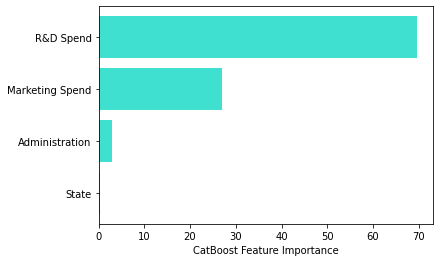

In [108]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(cat_data.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# xgboost

In [110]:
import xgboost as xg


 
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(x_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

XGBoostError: [20:04:38] C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/data/data.cc:556: Check failed: labels_.Size() == num_row_ (40 vs. 45) : Size of labels must equal to number of rows.